In [2]:
#exploratory work

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
movies.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [5]:
#check the shape
movies.shape

(4803, 20)

In [6]:
#check null values
movies.isnull().sum()
#we see there are, in fact, null values

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
#check data types for anything surprising
movies.dtypes
#the date field might be tricky to work with

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [8]:
#starting to manipulate the data

In [9]:
#making a year field
movies['year'] = movies['release_date'].astype(str).str[:4]

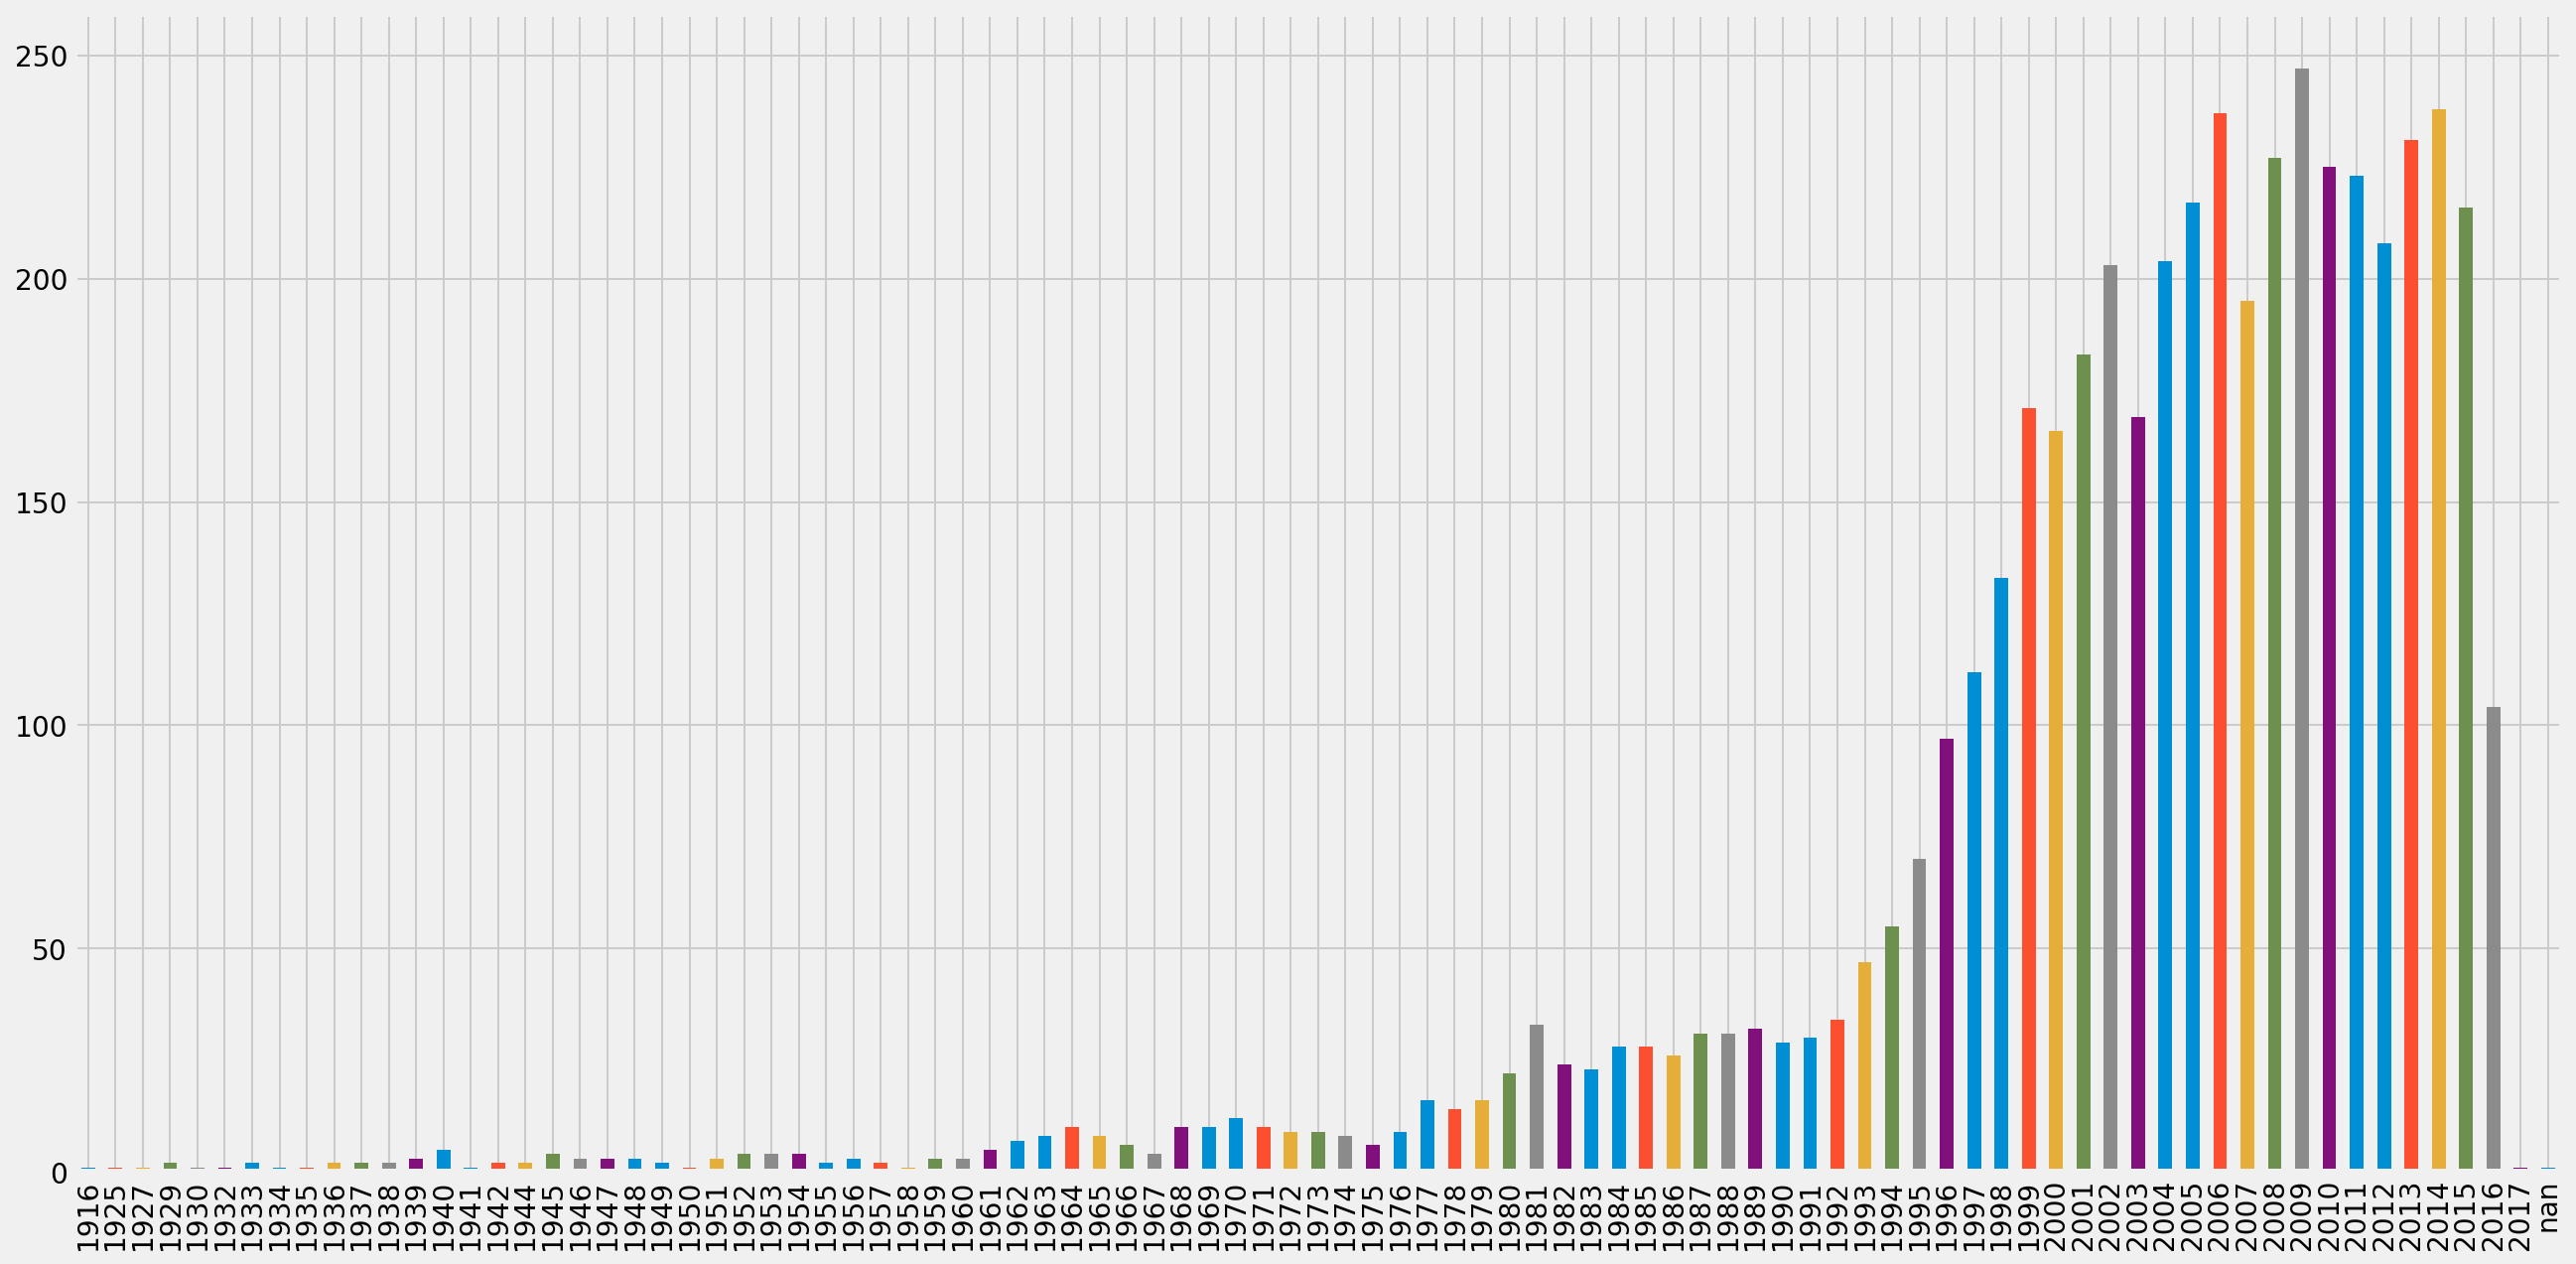

In [10]:
#visualizing the number of movies per year for distribution
ax = movies.year.value_counts().sort_index().plot(kind='bar', figsize=(20,10))

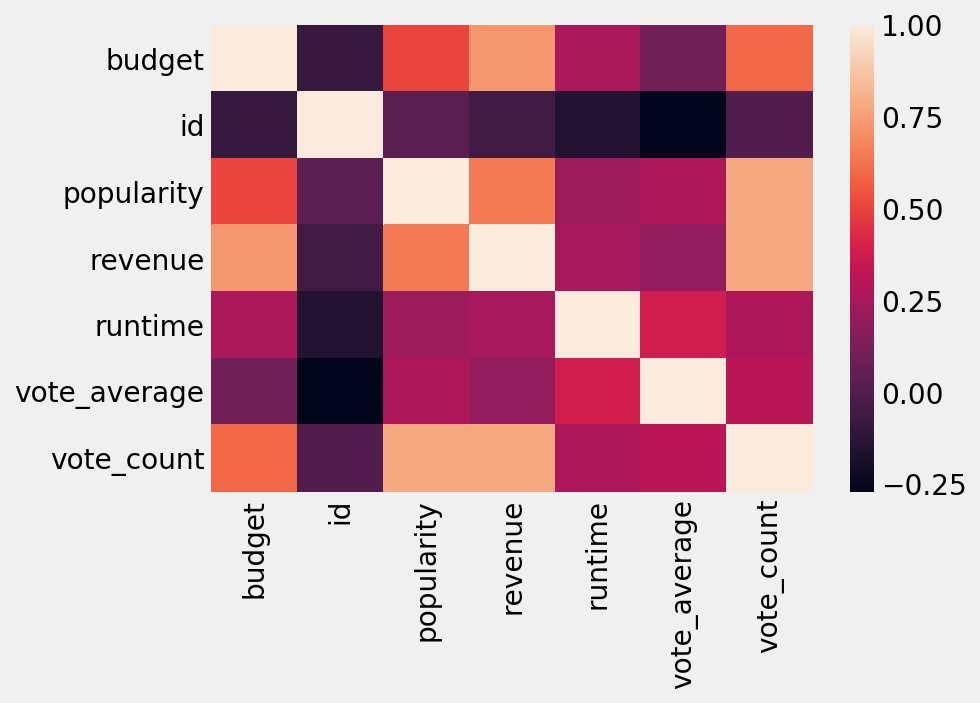

In [11]:
#checking for basic correlations, too early though, still need to clean data
movies_correlations = movies.corr();
sns.heatmap(movies_correlations);

In [12]:
#cleaning up the genre field
new_test_df = df = pd.DataFrame(movies.genres) 

In [13]:
new_test_df.head(5)

genres
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...

In [77]:
new_test_df_three = pd.DataFrame(movies['genres'].values.tolist(), index = movies.index)

In [78]:
new_test_df_three.head(5)

0
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...

In [79]:
new_test_df_three['Drama'] = new_test_df_three[0].str.contains("Drama")
new_test_df_three['Comedy'] = new_test_df_three[0].str.contains("Comedy")
new_test_df_three['Action'] = new_test_df_three[0].str.contains("Action")
new_test_df_three['Adventure'] = new_test_df_three[0].str.contains("Adventure")
new_test_df_three['Horror'] = new_test_df_three[0].str.contains("Horror")
new_test_df_three['Crime'] = new_test_df_three[0].str.contains("Crime")
new_test_df_three['Thriller'] = new_test_df_three[0].str.contains("Thriller")
new_test_df_three['Animation'] = new_test_df_three[0].str.contains("Animation")
new_test_df_three['Fantasy'] = new_test_df_three[0].str.contains("Fantasy")
new_test_df_three['Romance'] = new_test_df_three[0].str.contains("Romance")
new_test_df_three['Science Fiction'] = new_test_df_three[0].str.contains("Science Fiction")
new_test_df_three['Documentary'] = new_test_df_three[0].str.contains("Documentary")
new_test_df_three['Family'] = new_test_df_three[0].str.contains("Family")
new_test_df_three['Mystery'] = new_test_df_three[0].str.contains("Mystery")
new_test_df_three['Music'] = new_test_df_three[0].str.contains("Music")
new_test_df_three['Western'] = new_test_df_three[0].str.contains("Western")
new_test_df_three['History'] = new_test_df_three[0].str.contains("History")
new_test_df_three['War'] = new_test_df_three[0].str.contains("War")
new_test_df_three['TV Movie'] = new_test_df_three[0].str.contains("TV Movie")
new_test_df_three['Foreign'] = new_test_df_three[0].str.contains("Foreign")
new_test_df_three.head(5)

0  Drama  Comedy  Action  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  False   False    True   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...  False   False    True   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  False   False    True   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   True   False    True   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  False   False    True   

   Adventure  Horror  Crime  Thriller  Animation  Fantasy   ...     \
0       True   False  False     False      False     True   ...      
1       True   False  False     False      False     True   ...      
2       True   False   True     False      False    False   ...      
3      False   False   True      True      False    False   ...      
4       True   False  False     False      False    False   ...      

   Science Fiction  Documentary  Family  Mystery  Music  Western  History  \
0             True        False   False    False  False    False    False   
1            False        False   False    False  False    False    False   
2            False        False   False    False  False    False    False   
3            False        False   False    False  False    False    False   
4             True        False   False    False  False    False    False   

     War  TV Movie  Foreign  
0  False     False    False  
1  False     False    False  
2  False     False    False  
3  False     False    False  
4  False     False    False  

[5 rows x 21 columns]

In [81]:
new_test_df_five = new_test_df_three.drop([new_test_df_three.columns[0]],axis='columns')
new_test_df_five.sample(5)

Drama  Comedy  Action  Adventure  Horror  Crime  Thriller  Animation  \
4102  False   False   False      False    True  False     False      False   
3755  False    True    True      False   False  False     False      False   
3693   True   False   False      False   False  False     False      False   
1605  False   False   False      False    True  False      True      False   
2353   True   False   False      False   False  False     False      False   

      Fantasy  Romance  Science Fiction  Documentary  Family  Mystery  Music  \
4102    False    False            False        False   False    False  False   
3755    False    False            False        False   False    False  False   
3693    False    False            False        False   False    False  False   
1605    False    False            False        False   False    False  False   
2353    False    False            False        False   False    False  False   

      Western  History    War  TV Movie  Foreign  
4102    False    False  False     False    False  
3755    False    False  False     False    False  
3693    False    False  False     False    False  
1605    False    False  False     False    False  
2353    False    False  False     False    False

In [82]:
#adding new genre fields back to the original df
movies_final = pd.concat([movies, new_test_df_five], axis=1)
movies_final.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies   ...    Science Fiction  \
0  [{"name": "Ingenious Film Partners", "id": 289...   ...               True   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   ...              False   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   ...              False   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   ...              False   
4        [{"name": "Walt Disney Pictures", "id": 2}]   ...               True   

  Documentary  Family  Mystery  Music Western History    War  TV Movie  \
0       False   False    False  False   False   False  False     False   
1       False   False    False  False   False   False  False     False   
2       False   False    False  False   False   False  False     False   
3       False   False    False  False   False   False  False     False   
4       False   False    False  False   False   False  False     False   

   Foreign  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 41 columns]

In [83]:
movies_final = movies_final.drop(columns=['original_language','original_title'])
movies_final.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date   ...     \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   ...      
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   ...      
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   ...      
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   ...      
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   ...      

   Science Fiction  Documentary Family Mystery  Music Western  History    War  \
0             True        False  False   False  False   False    False  False   
1            False        False  False   False  False   False    False  False   
2            False        False  False   False  False   False    False  False   
3            False        False  False   False  False   False    False  False   
4             True        False  False   False  False   False    False  False   

  TV Movie  Foreign  
0    False    False  
1    False    False  
2    False    False  
3    False    False  
4    False    False  

[5 rows x 39 columns]

In [85]:
movies_final = movies_final.drop(columns=['popularity','production_countries'])
movies_final.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2015-10-26   880674609   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   2012-07-16  1084939099   
4        [{"name": "Walt Disney Pictures", "id": 2}]   2012-03-07   284139100   

   runtime   ...    Science Fiction Documentary Family Mystery  Music  \
0    162.0   ...               True       False  False   False  False   
1    169.0   ...              False       False  False   False  False   
2    148.0   ...              False       False  False   False  False   
3    165.0   ...              False       False  False   False  False   
4    132.0   ...               True       False  False   False  False   

   Western History    War  TV Movie  Foreign  
0    False   False  False     False    False  
1    False   False  False     False    False  
2    False   False  False     False    False  
3    False   False  False     False    False  
4    False   False  False     False    False  

[5 rows x 37 columns]

In [86]:
movies_final.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [87]:
movies_final = movies_final[movies_final.status == 'Released']
movies_final.status.value_counts()

Released    4795
Name: status, dtype: int64

In [88]:
movies_final = movies_final.drop(columns=['status'])
movies_final.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2015-10-26   880674609   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   2012-07-16  1084939099   
4        [{"name": "Walt Disney Pictures", "id": 2}]   2012-03-07   284139100   

   runtime   ...    Science Fiction Documentary Family  Mystery  Music  \
0    162.0   ...               True       False  False    False  False   
1    169.0   ...              False       False  False    False  False   
2    148.0   ...              False       False  False    False  False   
3    165.0   ...              False       False  False    False  False   
4    132.0   ...               True       False  False    False  False   

  Western  History    War  TV Movie  Foreign  
0   False    False  False     False    False  
1   False    False  False     False    False  
2   False    False  False     False    False  
3   False    False  False     False    False  
4   False    False  False     False    False  

[5 rows x 36 columns]

In [89]:
movies_final.shape

(4795, 36)

In [90]:
movies_final.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'overview',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count',
       'year', 'Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime',
       'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction',
       'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History',
       'War', 'TV Movie', 'Foreign'],
      dtype='object')

In [91]:
pd.isnull(movies_final).sum()

budget                     0
genres                     0
homepage                3086
id                         0
keywords                   0
overview                   3
production_companies       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
tagline                  838
title                      0
vote_average               0
vote_count                 0
year                       0
Drama                      0
Comedy                     0
Action                     0
Adventure                  0
Horror                     0
Crime                      0
Thriller                   0
Animation                  0
Fantasy                    0
Romance                    0
Science Fiction            0
Documentary                0
Family                     0
Mystery                    0
Music                      0
Western                    0
History                    0
War                        0
TV Movie      

In [92]:
movies_final_two = movies_final.drop(columns=['homepage','runtime','release_date','overview','homepage','tagline'])
pd.isnull(movies_final_two).sum()

budget                  0
genres                  0
id                      0
keywords                0
production_companies    0
revenue                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
year                    0
Drama                   0
Comedy                  0
Action                  0
Adventure               0
Horror                  0
Crime                   0
Thriller                0
Animation               0
Fantasy                 0
Romance                 0
Science Fiction         0
Documentary             0
Family                  0
Mystery                 0
Music                   0
Western                 0
History                 0
War                     0
TV Movie                0
Foreign                 0
dtype: int64

In [93]:
genre_list = ('Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign')
print(genre_list)

('Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign')


In [94]:
movies_final_two[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign']] = movies_final_two[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign']].astype(int)
movies_final_two.head(5)

movies_final[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign']] = movies_final[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign']].astype(int)
movies_final.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2015-10-26   880674609   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   2012-07-16  1084939099   
4        [{"name": "Walt Disney Pictures", "id": 2}]   2012-03-07   284139100   

   runtime   ...    Science Fiction Documentary Family  Mystery  Music  \
0    162.0   ...                  1           0      0        0      0   
1    169.0   ...                  0           0      0        0      0   
2    148.0   ...                  0           0      0        0      0   
3    165.0   ...                  0           0      0        0      0   
4    132.0   ...                  1           0      0        0      0   

  Western  History  War  TV Movie  Foreign  
0       0        0    0         0        0  
1       0        0    0         0        0  
2       0        0    0         0        0  
3       0        0    0         0        0  
4       0        0    0         0        0  

[5 rows x 36 columns]

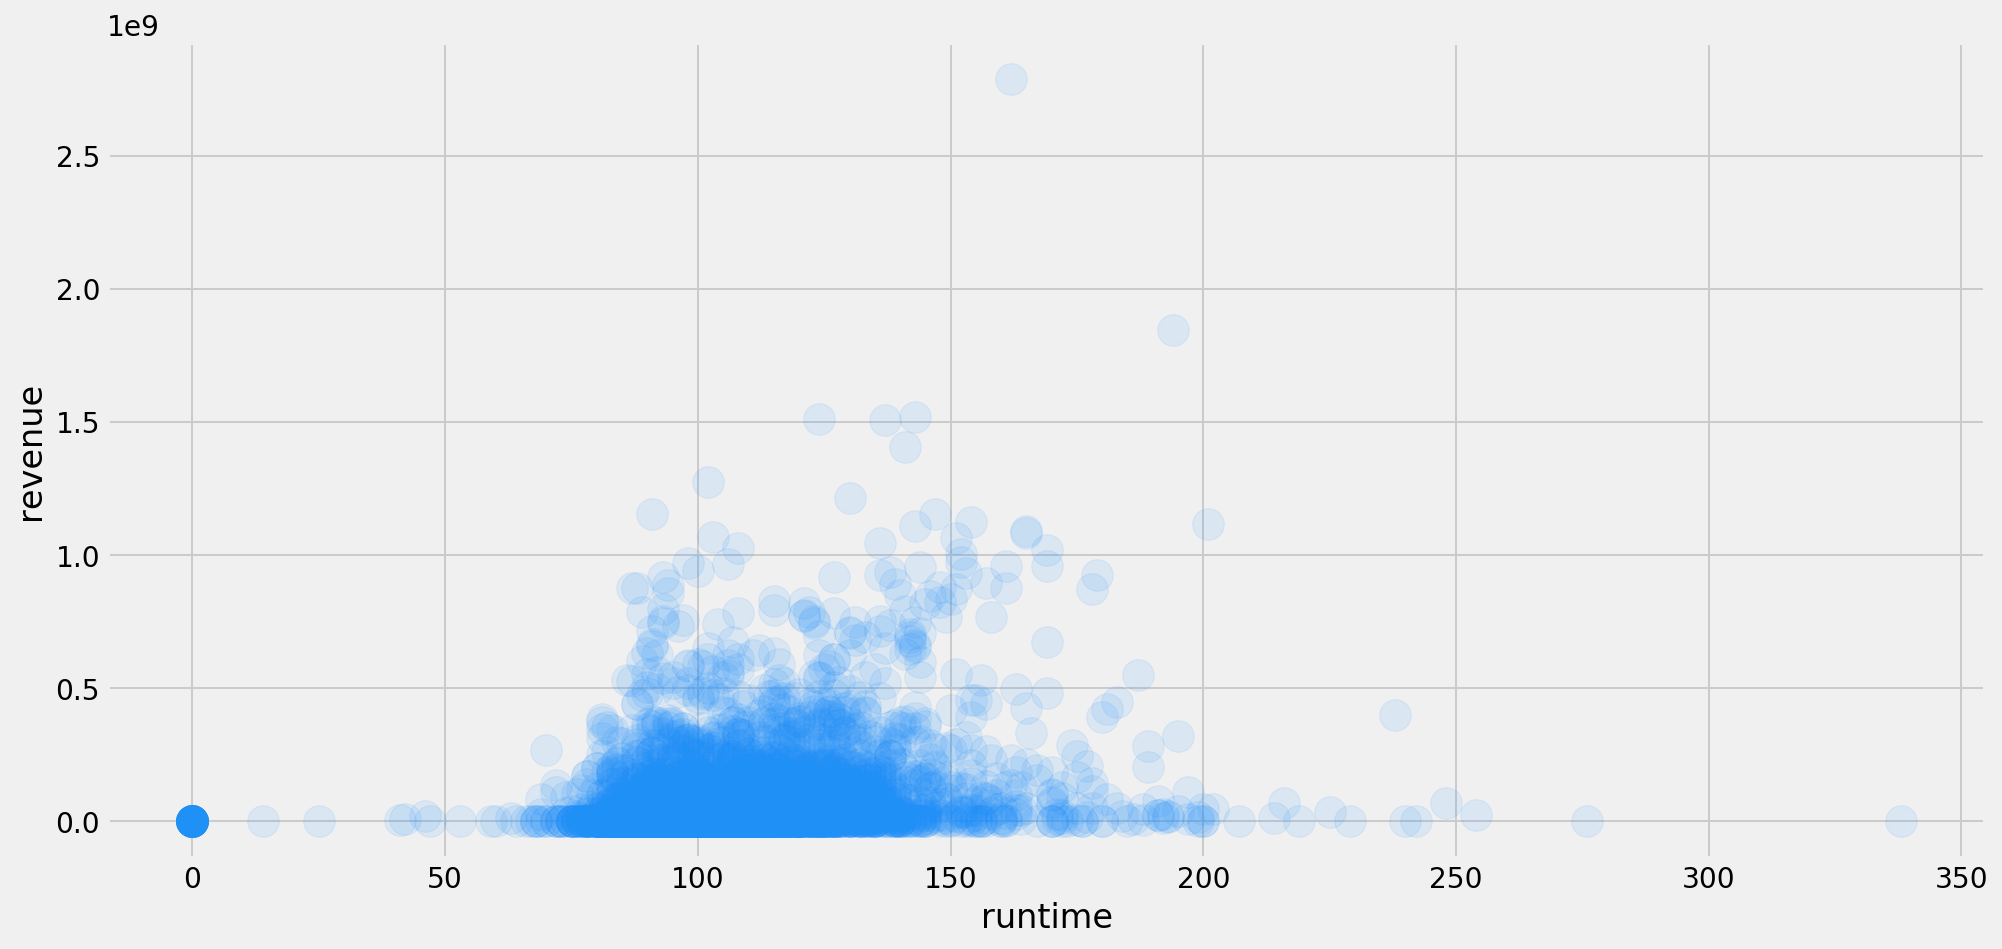

In [95]:
movies_final.plot(x = 'runtime', y='revenue', kind='scatter', color='dodgerblue', figsize=(15,7), s=250, alpha = .1);

In [96]:
movies_final_four = movies_final[pd.notna(movies_final['homepage'])]

In [97]:
movies_final_four.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2015-10-26   880674609   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   2012-07-16  1084939099   
4        [{"name": "Walt Disney Pictures", "id": 2}]   2012-03-07   284139100   

   runtime   ...    Science Fiction Documentary Family  Mystery  Music  \
0    162.0   ...                  1           0      0        0      0   
1    169.0   ...                  0           0      0        0      0   
2    148.0   ...                  0           0      0        0      0   
3    165.0   ...                  0           0      0        0      0   
4    132.0   ...                  1           0      0        0      0   

  Western  History  War  TV Movie  Foreign  
0       0        0    0         0        0  
1       0        0    0         0        0  
2       0        0    0         0        0  
3       0        0    0         0        0  
4       0        0    0         0        0  

[5 rows x 36 columns]

In [98]:
movies_final_four = movies_final[pd.notna(movies_final['homepage'])]

In [103]:
movies_final_four["year_int"] = movies_final_four.year.astype(int)
movies_final_four.dtypes

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
overview                 object
production_companies     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
year                     object
Drama                     int64
Comedy                    int64
Action                    int64
Adventure                 int64
Horror                    int64
Crime                     int64
Thriller                  int64
Animation                 int64
Fantasy                   int64
Romance                   int64
Science Fiction           int64
Documentary               int64
Family                    int64
Mystery                   int64
Music                     int64
Western 

In [106]:
movies_1990 = movies_final_four[movies_final_four['year_int'] >= 1990]
#movies_1990 = movies_final_four[movies_final_four['year_int'] >= 1990]
#movies_1999.shape

In [110]:
movies_1990.sample(5)

budget                                             genres  \
1038  25000000  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   
2225  20000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
1340  37000000  [{"id": 35, "name": "Comedy"}, {"id": 80, "nam...   
1672  30000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   
4700    100000  [{"id": 18, "name": "Drama"}, {"id": 878, "nam...   

                                  homepage      id  \
1038        http://www.theinfiltrator.com/  325789   
2225         http://inherentvicemovie.com/  171274   
1340  http://werethemillers.warnerbros.com  138832   
1672             http://www.1911movie.com/   76349   
4700          http://www.anotherearth.com/   55420   

                                               keywords  \
1038  [{"id": 1568, "name": "undercover"}, {"id": 55...   
2225  [{"id": 818, "name": "based on novel"}, {"id":...   
1340  [{"id": 534, "name": "mexico"}, {"id": 6149, "...   
1672  [{"id": 779, "name": "martial arts"}, {"id": 1...   
4700  [{"id": 4627, "name": "earth"}, {"id": 10614, ...   

                                               overview  \
1038  A U.S Customs official uncovers a massive mone...   
2225  In Los Angeles at the turn of the 1970s, drug-...   
1340  A veteran pot dealer creates a fake family as ...   
1672  At the beginning of the 20th century, China is...   
4700  On the night of the discovery of a duplicate E...   

                                   production_companies release_date  \
1038              [{"name": "Good Films", "id": 68620}]   2016-07-13   
2225  [{"name": "Ghoulardi Film Company", "id": 178}...   2014-12-25   
1340  [{"name": "New Line Cinema", "id": 12}, {"name...   2013-08-07   
1672          [{"name": "Variance Films", "id": 15071}]   2011-07-03   
4700    [{"name": "Artists Public Domain", "id": 8145}]   2011-07-22   

        revenue  runtime    ...    Documentary Family Mystery  Music  Western  \
1038   15436808    127.0    ...              0      0       0      0        0   
2225   11110975    148.0    ...              0      0       1      0        0   
1340  269994119    110.0    ...              0      0       0      0        0   
1672     108348    125.0    ...              0      0       0      0        0   
4700    1776935     92.0    ...              0      0       0      0        0   

     History  War  TV Movie  Foreign  year_int  
1038       0    0         0        0      2016  
2225       0    0         0        0      2014  
1340       0    0         0        0      2013  
1672       1    1         0        0      2011  
4700       0    0         0        0      2011  

[5 rows x 37 columns]

In [111]:
inflation = pd.read_csv('inflation_data.csv')
inflation.head(5)

year  buying_power
0  1990      1.000000
1  1991      1.042081
2  1992      1.073451
3  1993      1.105585
4  1994      1.133894

In [114]:
movies_1990_two = pd.merge(movies_1990, inflation, left_on = 'year_int', right_on = 'year')
movies_1990_two.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  150000000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
3  200000000  [{"id": 28, "name": "Action"}, {"id": 878, "na...   
4  200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            homepage     id  \
0                        http://www.avatarmovie.com/  19995   
1  http://harrypotter.warnerbros.com/harrypottera...    767   
2                  http://www.transformersmovie.com/   8373   
3    https://www.warnerbros.com/terminator-salvation    534   
4            http://www.sonypictures.com/movies/2012  14161   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 616, "name": "witch"}, {"id": 2343, "n...   
2  [{"id": 1160, "name": "egypt"}, {"id": 1670, "...   
3  [{"id": 83, "name": "saving the world"}, {"id"...   
4  [{"id": 2163, "name": "civilization"}, {"id": ...   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  As Harry begins his sixth year at Hogwarts, he...   
2  Sam Witwicky leaves the Autobots behind for a ...   
3  All grown up in post-apocalyptic 2018, John Co...   
4  Dr. Adrian Helmsley, part of a worldwide geoph...   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Warner Bros.", "id": 6194}, {"name"...   2009-07-07   933959197   
2  [{"name": "Paramount Pictures", "id": 4}, {"na...   2009-06-19   836297228   
3  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2009-05-20   371353001   
4  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2009-10-10   769653595   

   runtime      ...      Mystery Music Western  History  War TV Movie  \
0    162.0      ...            0     0       0        0    0        0   
1    153.0      ...            0     0       0        0    0        0   
2    150.0      ...            0     0       0        0    0        0   
3    115.0      ...            0     0       0        0    0        0   
4    158.0      ...            0     0       0        0    0        0   

   Foreign  year_int  year_y  buying_power  
0        0      2009    2009      1.641446  
1        0      2009    2009      1.641446  
2        0      2009    2009      1.641446  
3        0      2009    2009      1.641446  
4        0      2009    2009      1.641446  

[5 rows x 39 columns]

In [116]:
#we need to adjust for inflation

movies_1990_two["revenue_adj"] = (movies_1990_two.revenue * movies_1990_two.buying_power)
movies_1990_two["budget_adj"] = (movies_1990_two.budget * movies_1990_two.buying_power)
movies_1990_two.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  150000000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
3  200000000  [{"id": 28, "name": "Action"}, {"id": 878, "na...   
4  200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            homepage     id  \
0                        http://www.avatarmovie.com/  19995   
1  http://harrypotter.warnerbros.com/harrypottera...    767   
2                  http://www.transformersmovie.com/   8373   
3    https://www.warnerbros.com/terminator-salvation    534   
4            http://www.sonypictures.com/movies/2012  14161   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 616, "name": "witch"}, {"id": 2343, "n...   
2  [{"id": 1160, "name": "egypt"}, {"id": 1670, "...   
3  [{"id": 83, "name": "saving the world"}, {"id"...   
4  [{"id": 2163, "name": "civilization"}, {"id": ...   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  As Harry begins his sixth year at Hogwarts, he...   
2  Sam Witwicky leaves the Autobots behind for a ...   
3  All grown up in post-apocalyptic 2018, John Co...   
4  Dr. Adrian Helmsley, part of a worldwide geoph...   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Warner Bros.", "id": 6194}, {"name"...   2009-07-07   933959197   
2  [{"name": "Paramount Pictures", "id": 4}, {"na...   2009-06-19   836297228   
3  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2009-05-20   371353001   
4  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2009-10-10   769653595   

   runtime      ...      Western History War  TV Movie  Foreign year_int  \
0    162.0      ...            0       0   0         0        0     2009   
1    153.0      ...            0       0   0         0        0     2009   
2    150.0      ...            0       0   0         0        0     2009   
3    115.0      ...            0       0   0         0        0     2009   
4    158.0      ...            0       0   0         0        0     2009   

   year_y  buying_power   revenue_adj    budget_adj  
0    2009      1.641446  4.576294e+09  3.890227e+08  
1    2009      1.641446  1.533044e+09  4.103615e+08  
2    2009      1.641446  1.372737e+09  2.462169e+08  
3    2009      1.641446  6.095559e+08  3.282892e+08  
4    2009      1.641446  1.263345e+09  3.282892e+08  

[5 rows x 41 columns]

In [117]:
#saving results as a csv for safekeeping
export_csv = movies_1990_two.to_csv(r'C:\Users\jstabinsky\Desktop\movies_1990_two.csv', index = None, header=True)
print(movies_1990_two)
movies_1990_two.to_csv(r'C:\Users\jstabinsky\Desktop\movies_1990_two.csv', index = None, header=True)

         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     150000000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
3     200000000  [{"id": 28, "name": "Action"}, {"id": 878, "na...   
4     200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
5     200000000  [{"id": 16, "name": "Animation"}, {"id": 18, "...   
6     175000000  [{"id": 16, "name": "Animation"}, {"id": 35, "...   
7     175000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
8     175000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
9     150000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
10    150000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
11    150000000  [{"id": 53, "name": "Thriller"}, {"id": 9648, ...   
12    150000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
13    130000000  [{"

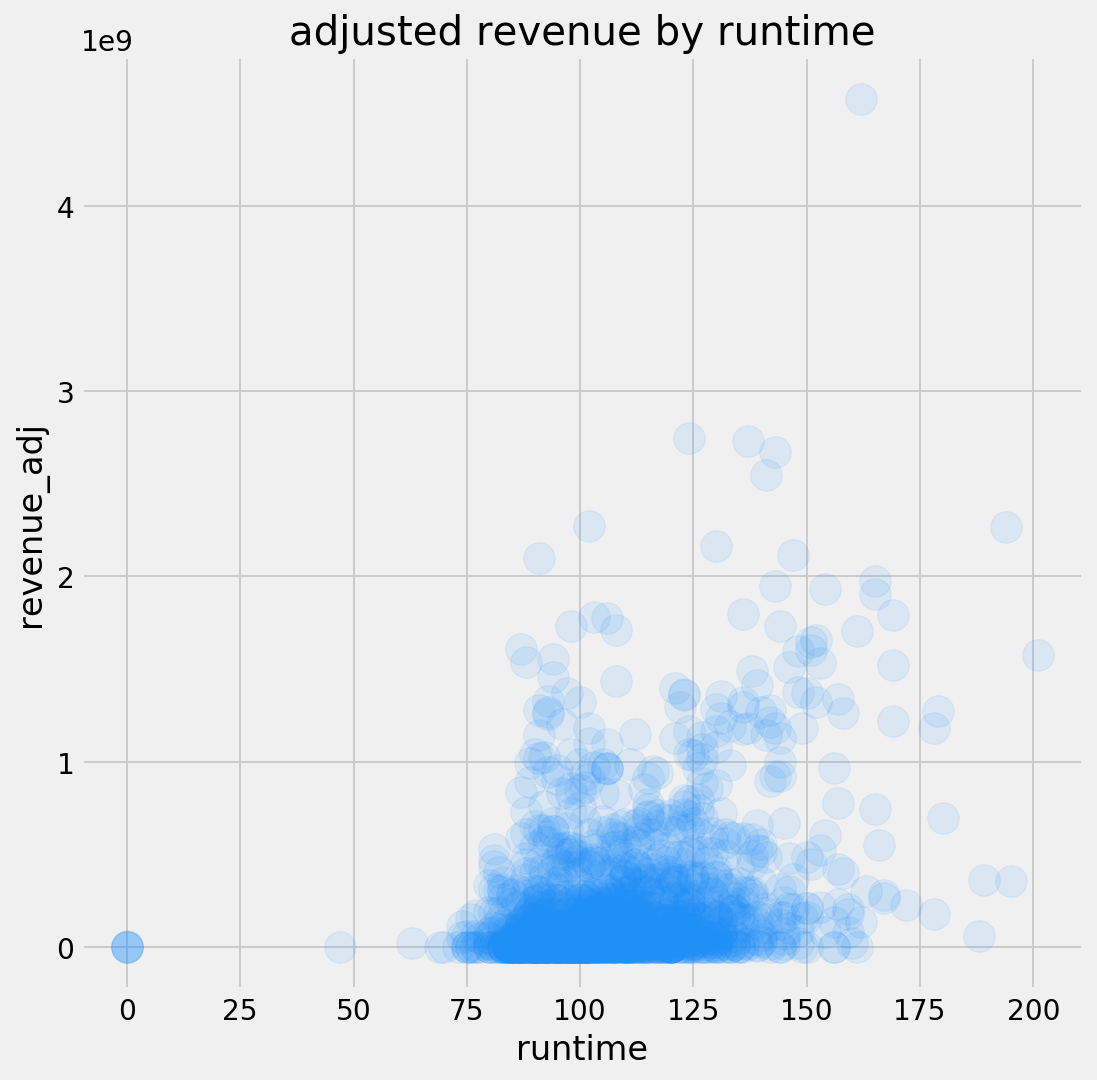

In [118]:
movies_1990_two.plot(x = 'runtime', y='revenue_adj', kind='scatter', color='dodgerblue', figsize=(8,8), s=250, alpha = .1, title = "adjusted revenue by runtime");

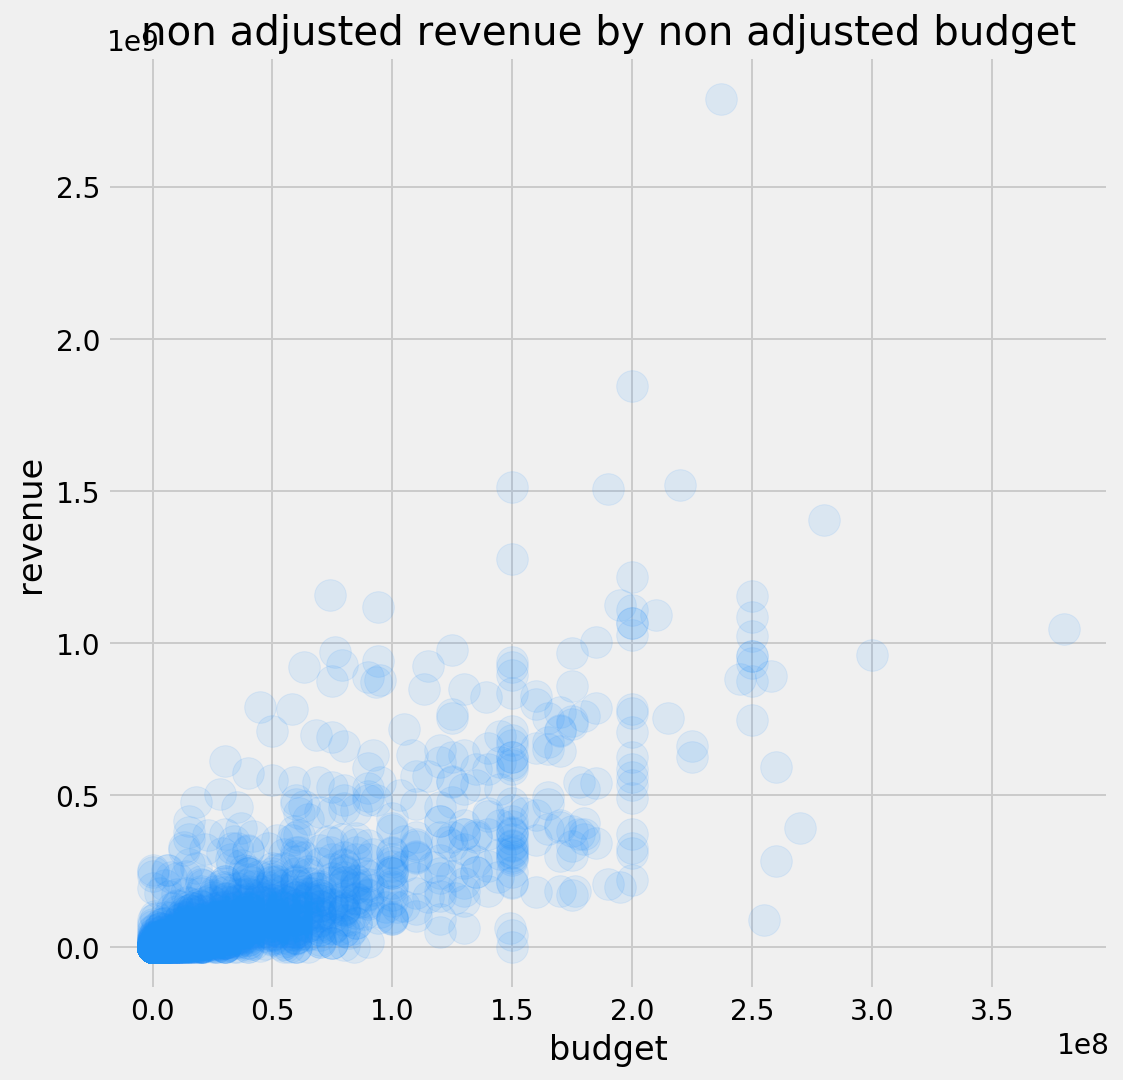

In [119]:
movies_1990_two.plot(x = 'budget', y='revenue', kind='scatter', color='dodgerblue', figsize=(8,8), s=250, alpha = .1, title = "non adjusted revenue by non adjusted budget");

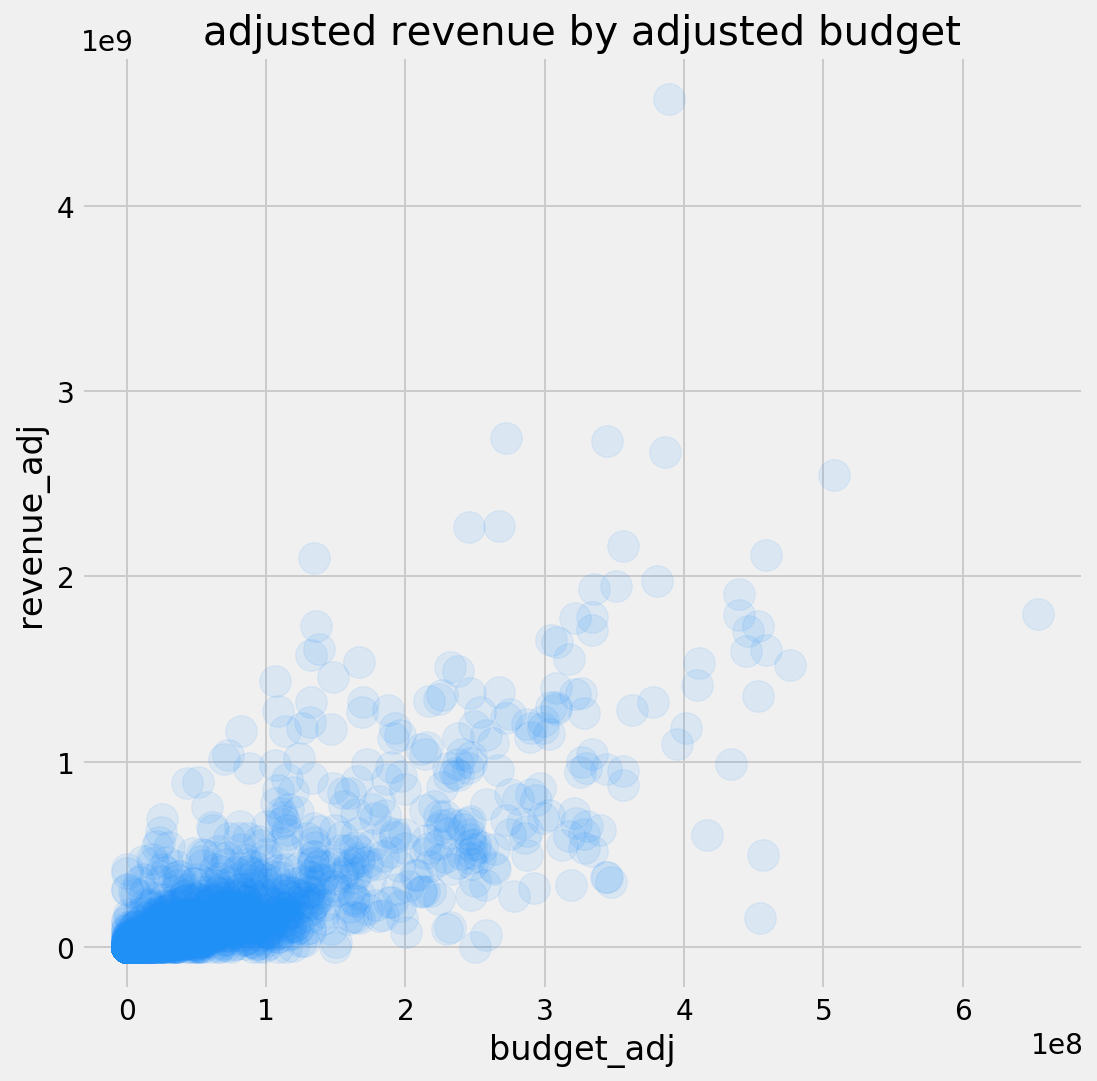

In [120]:
movies_1990_two.plot(x = 'budget_adj', y='revenue_adj', kind='scatter', color='dodgerblue', figsize=(8,8), s=250, alpha = .1, title = "adjusted revenue by adjusted budget");

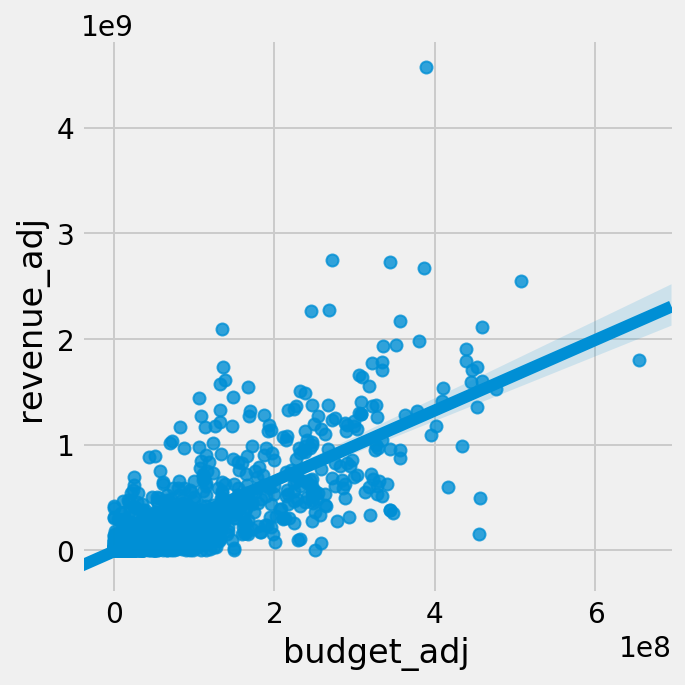

In [121]:
sns.lmplot(x = 'budget_adj', y='revenue_adj',data=movies_1990_two,fit_reg=True) 

In [122]:
genre_list = ('Drama','Comedy','Action','Adventure','Horror','Crime','Thriller','Animation','Fantasy','Romance','Science Fiction','Documentary','Family','Mystery','Music','Western','History','War','TV Movie','Foreign')

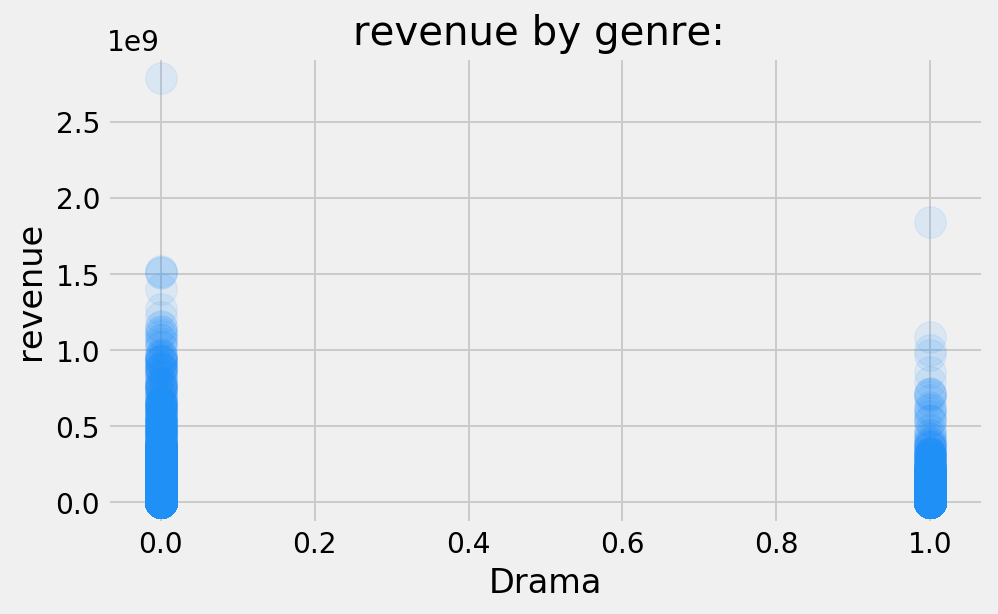

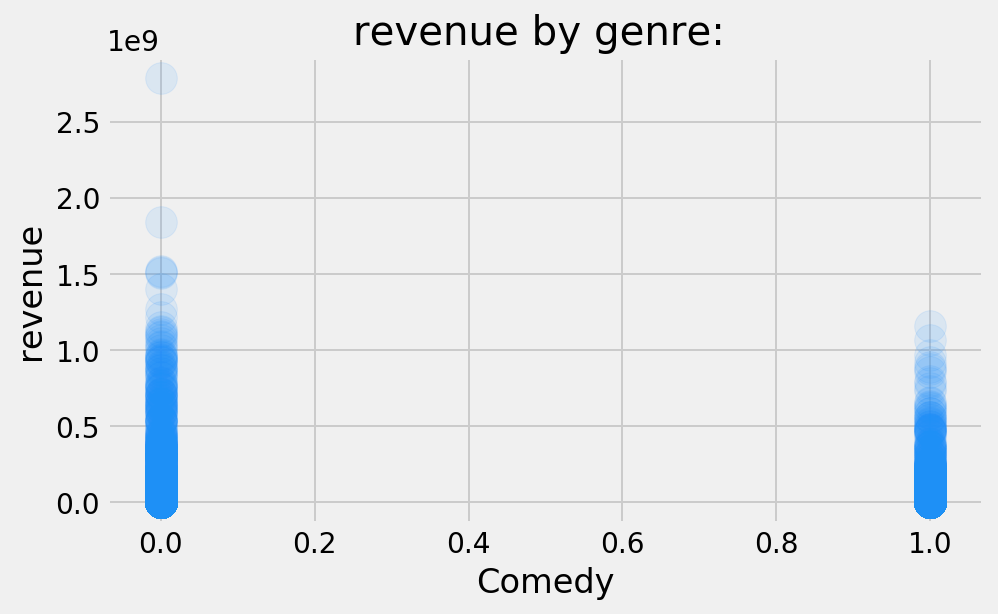

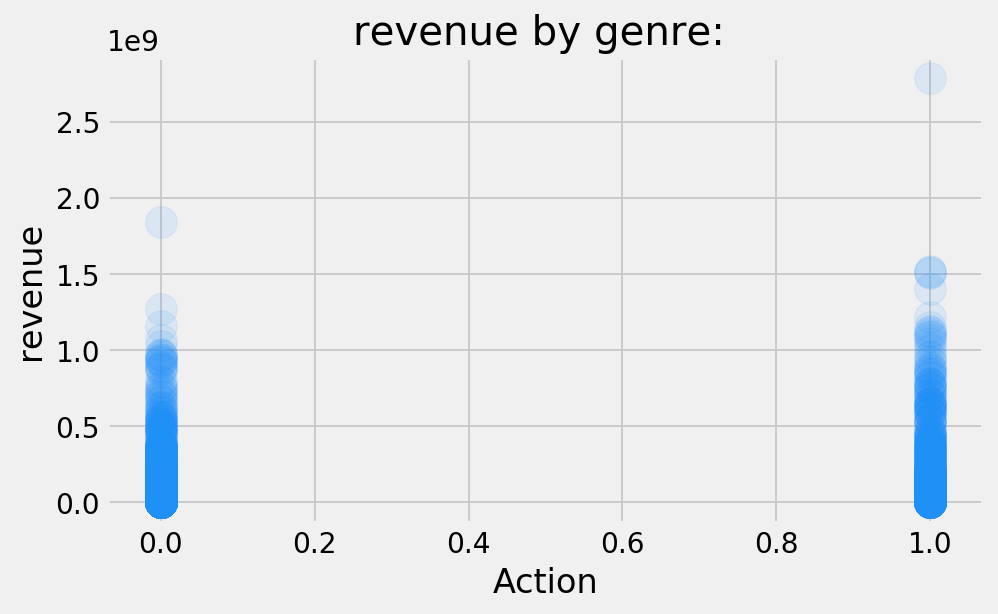

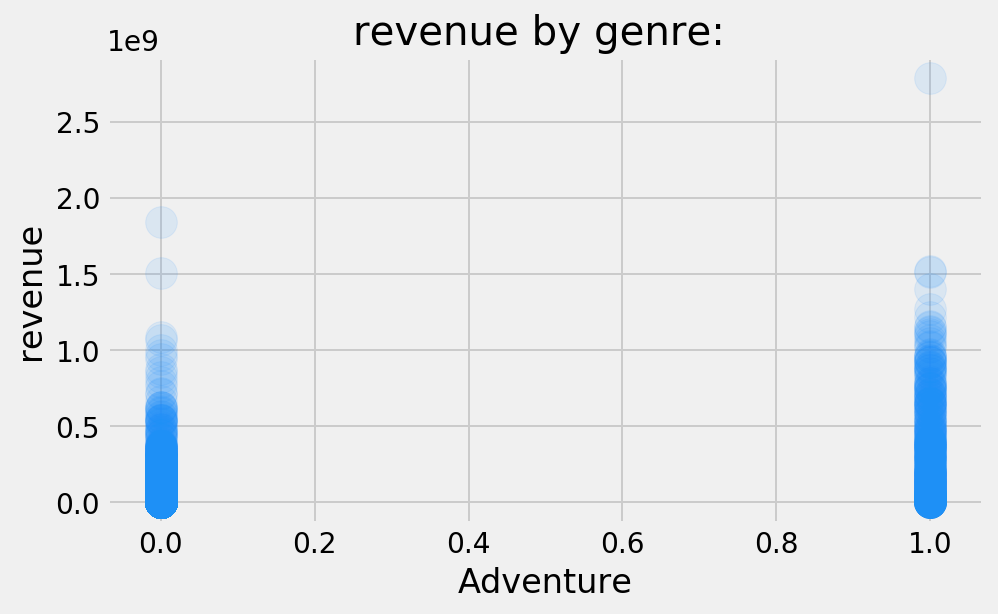

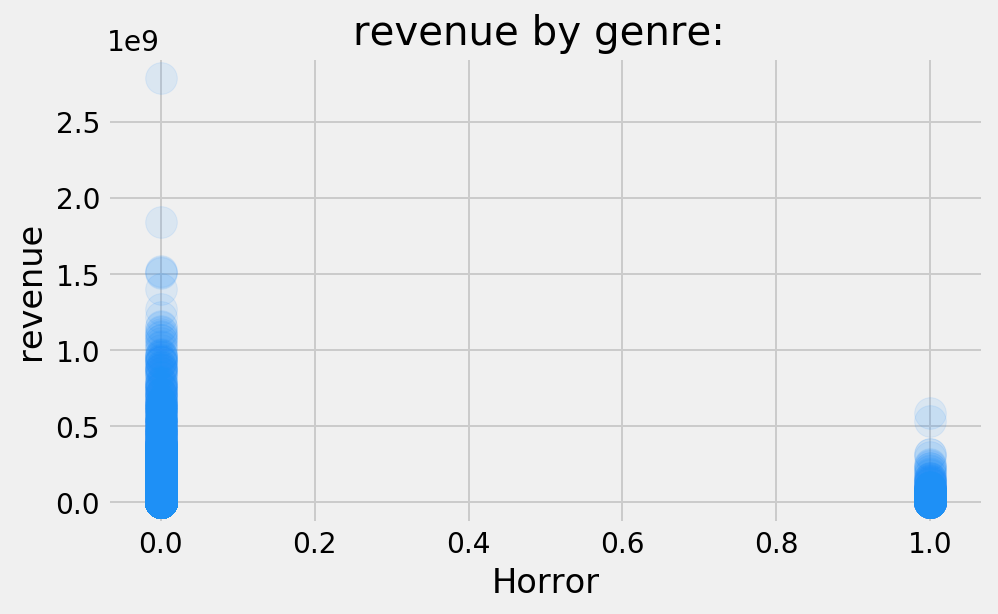

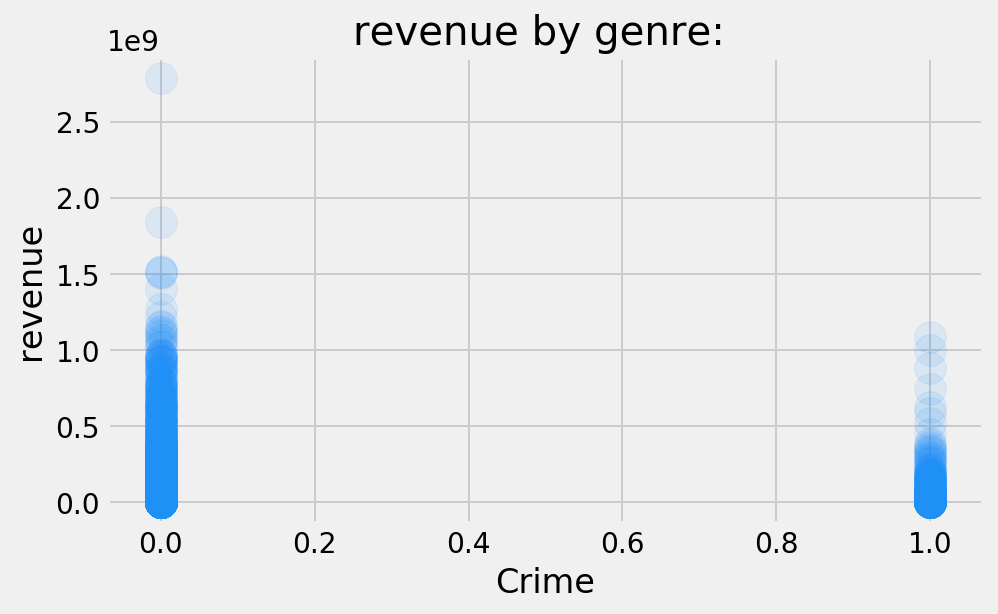

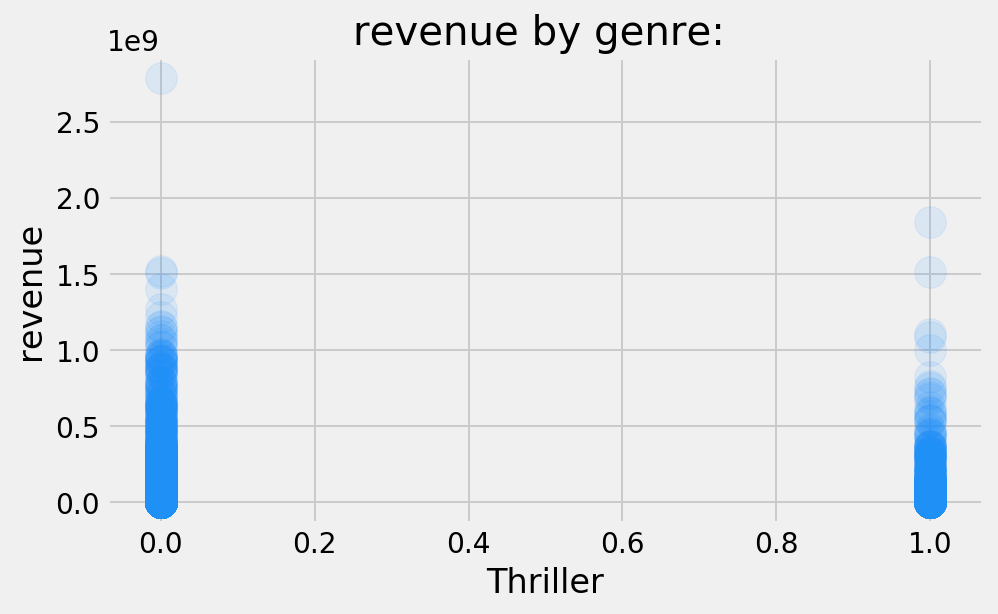

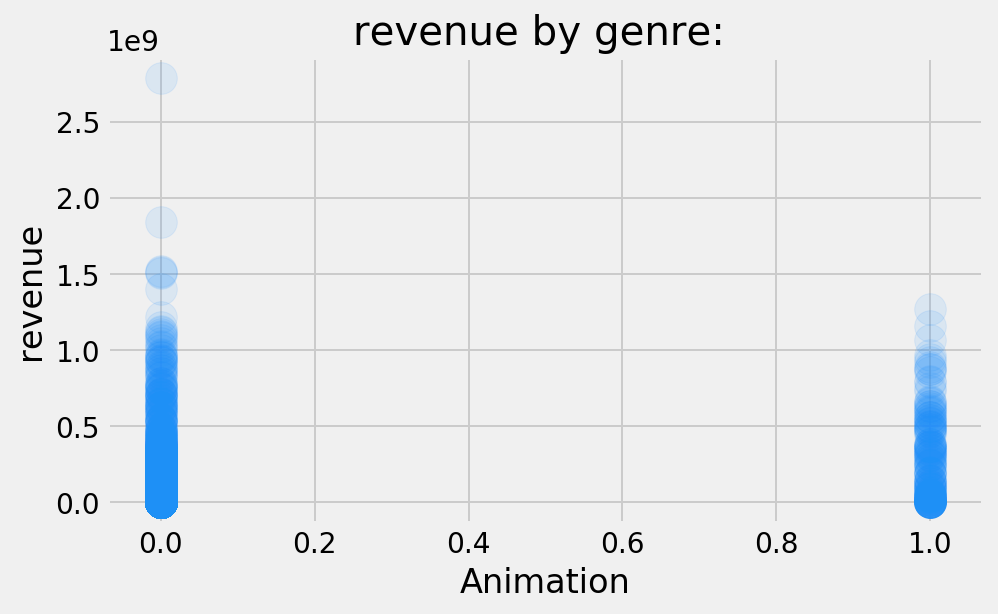

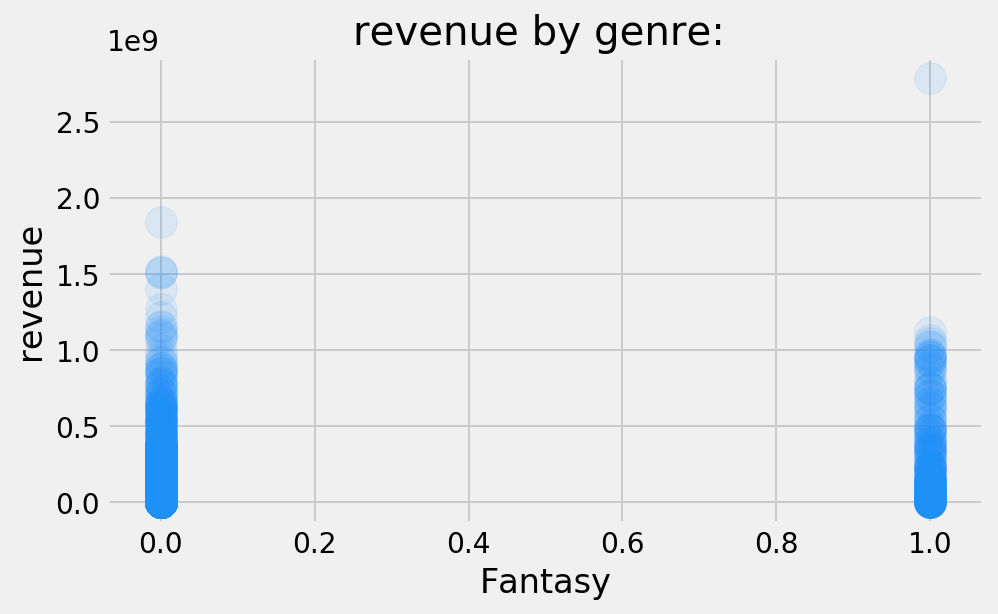

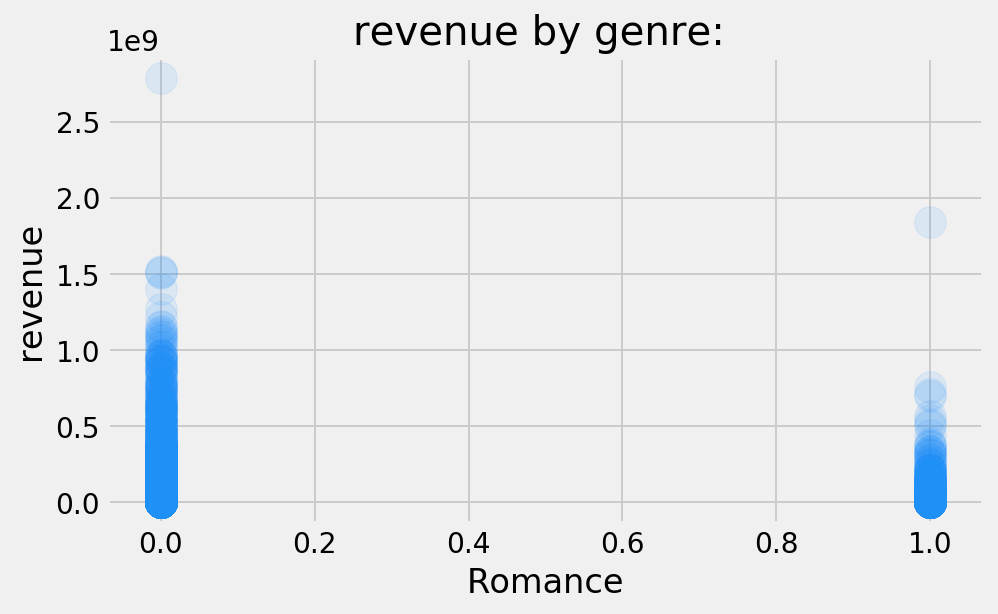

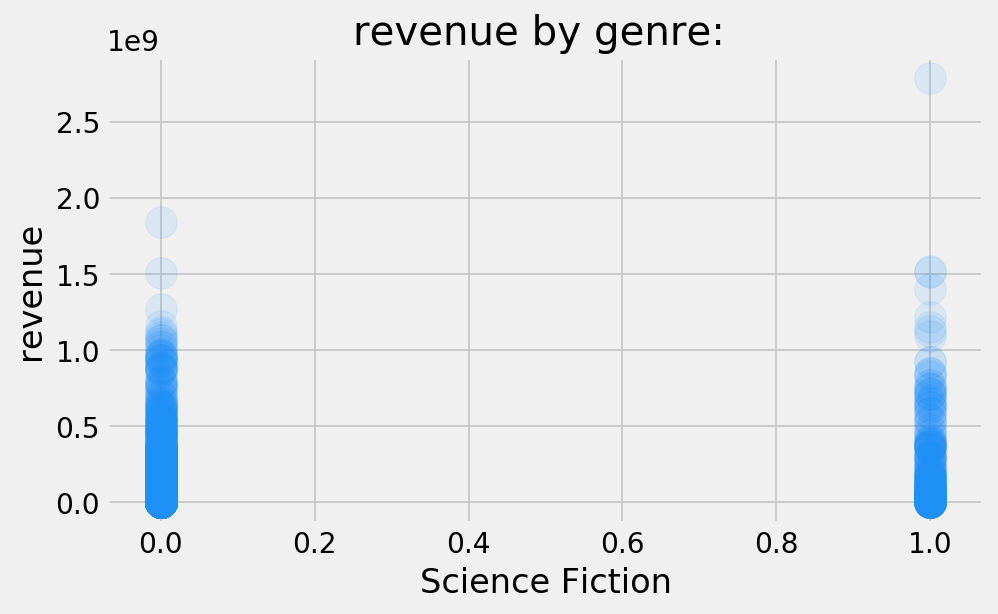

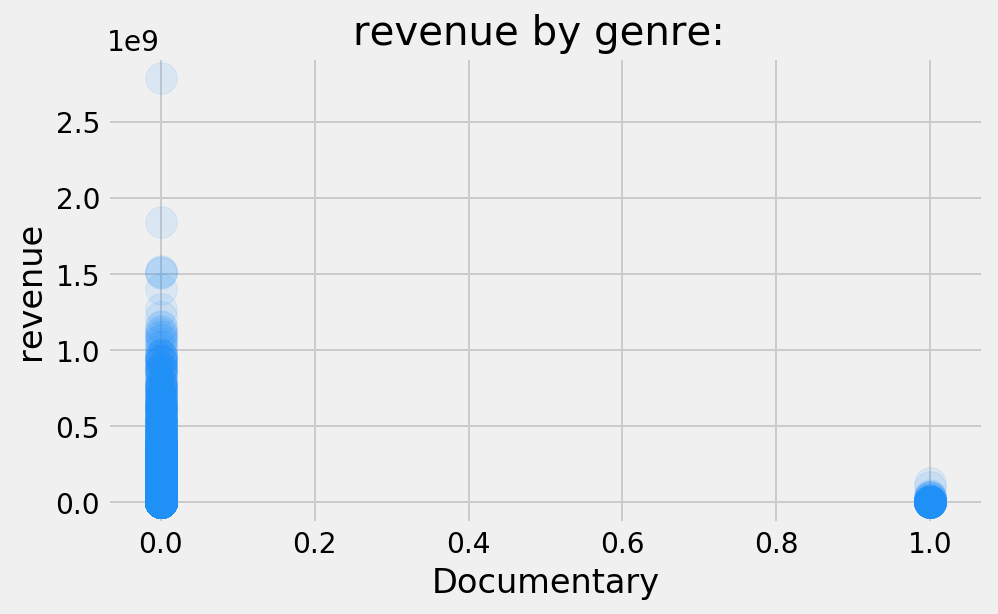

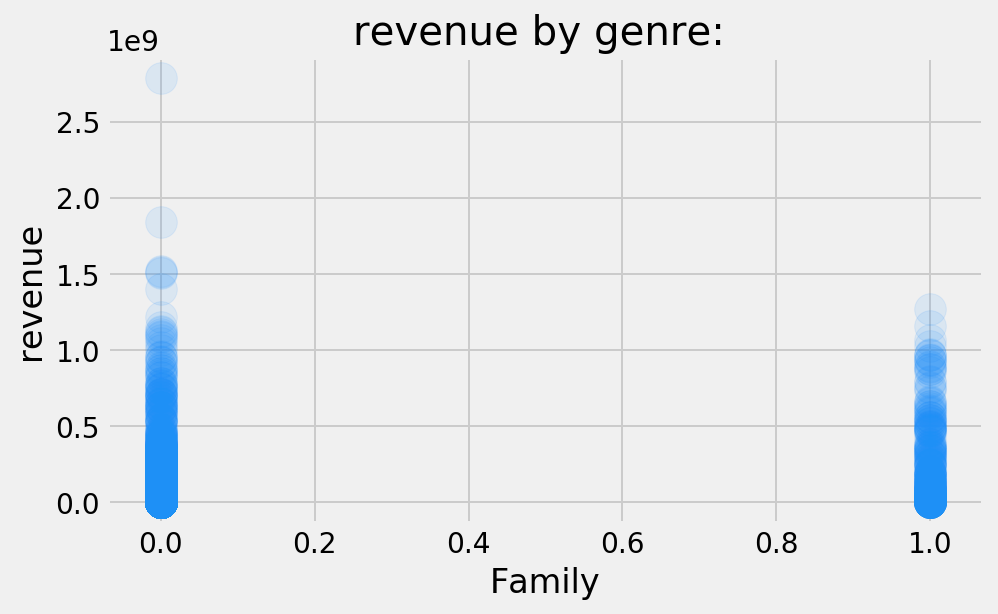

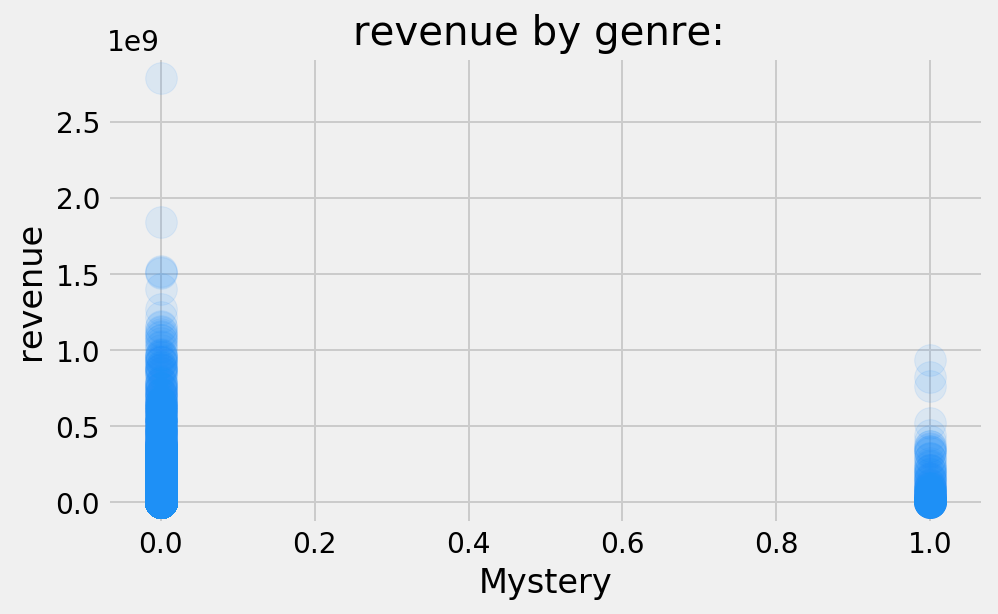

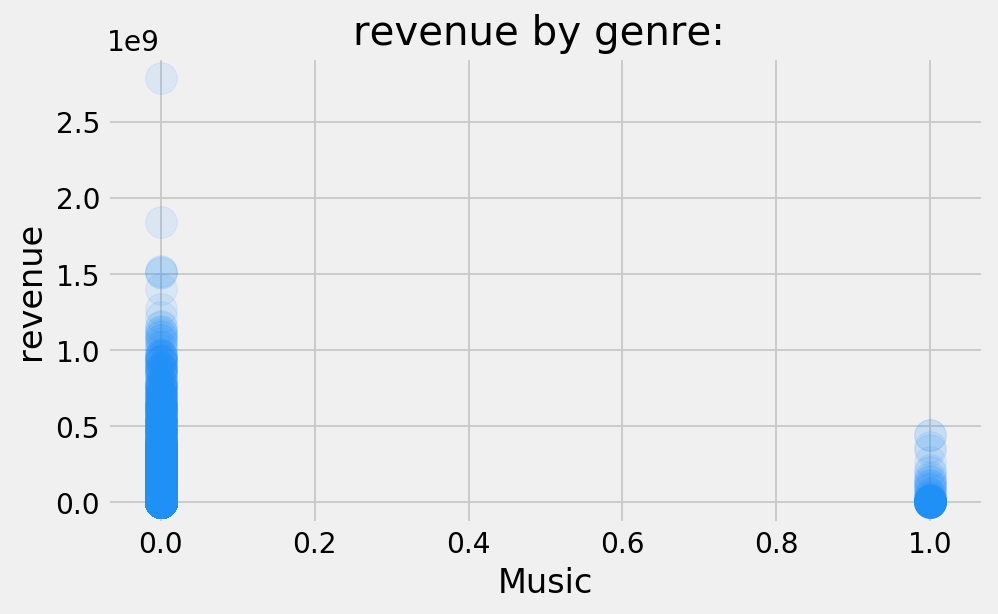

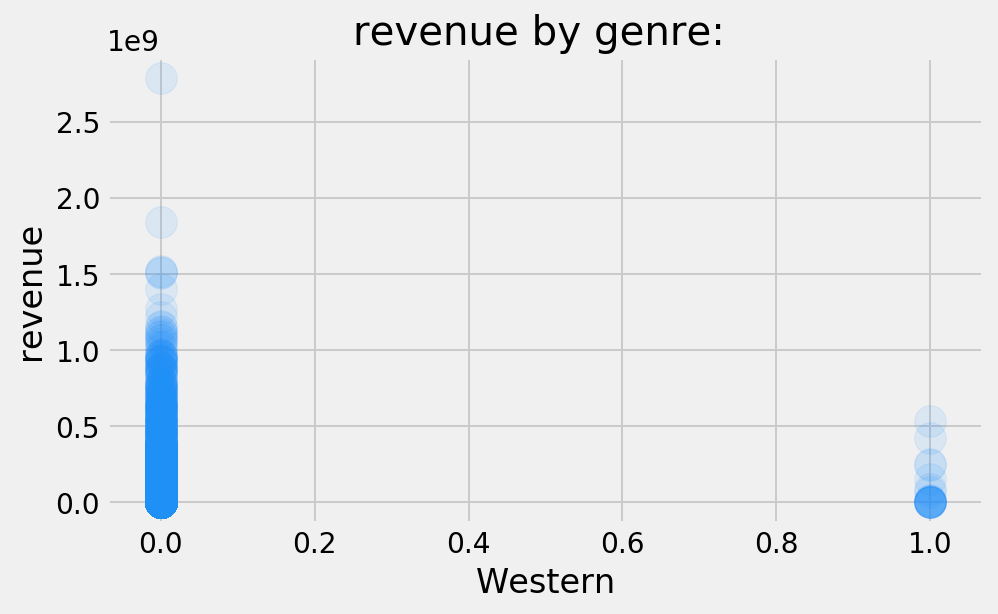

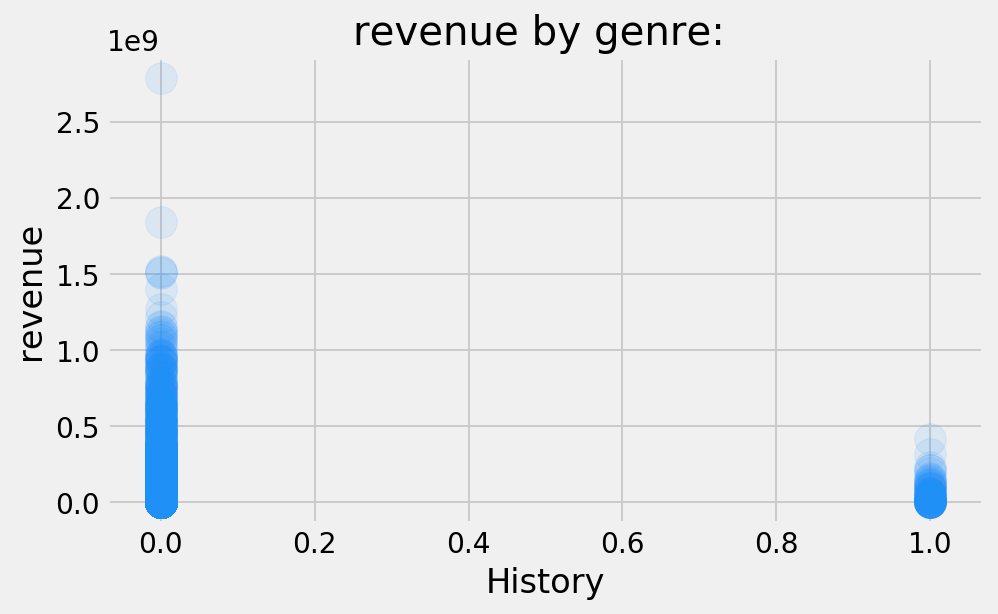

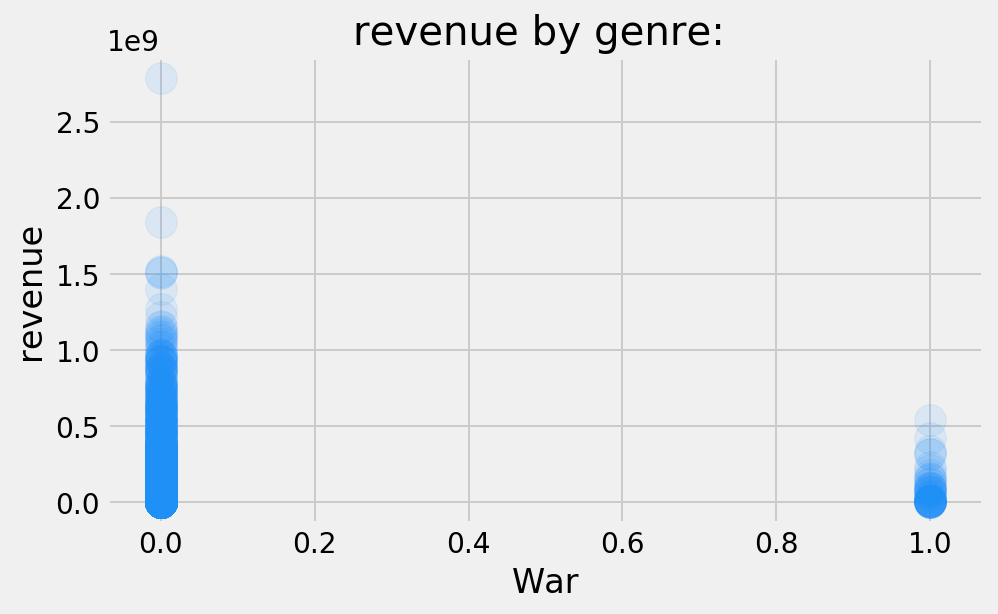

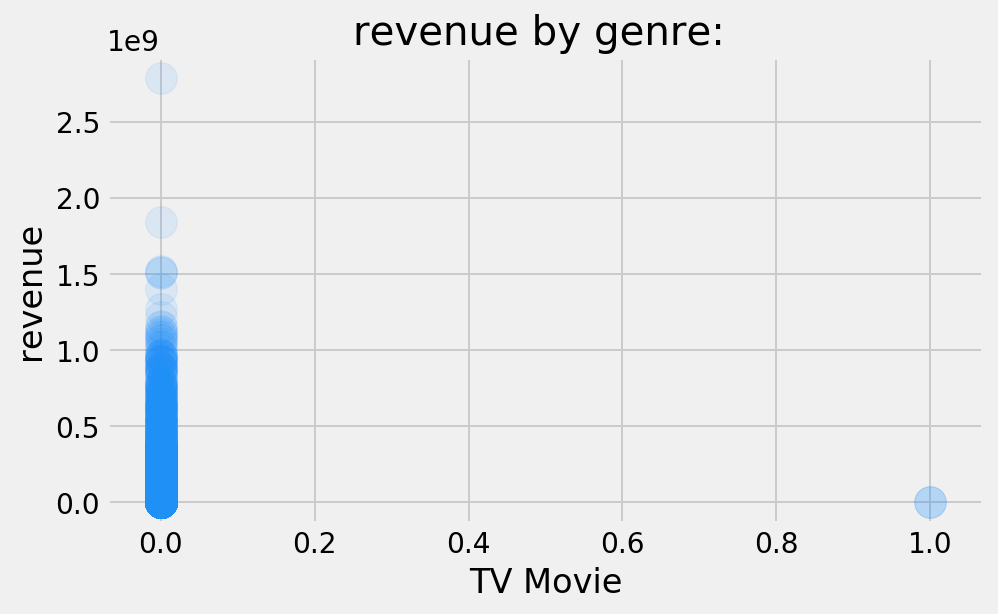

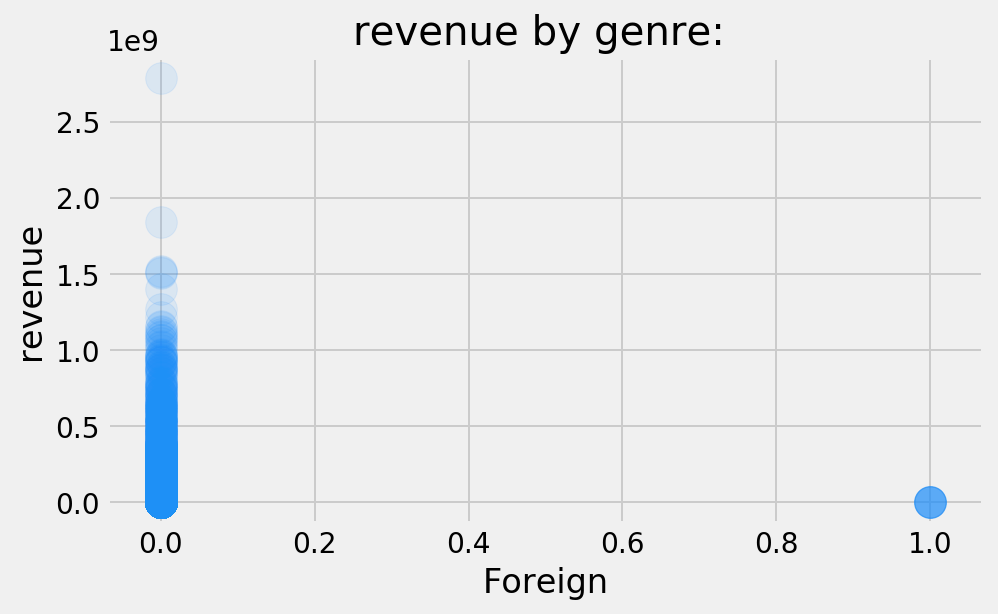

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for genre in genre_list:
    movies_1990_two.plot(x = genre, y='revenue', kind='scatter', color='dodgerblue', figsize=(7,4), s=250, alpha = .1, title = ('revenue by genre: '.format(genre)));
    
    

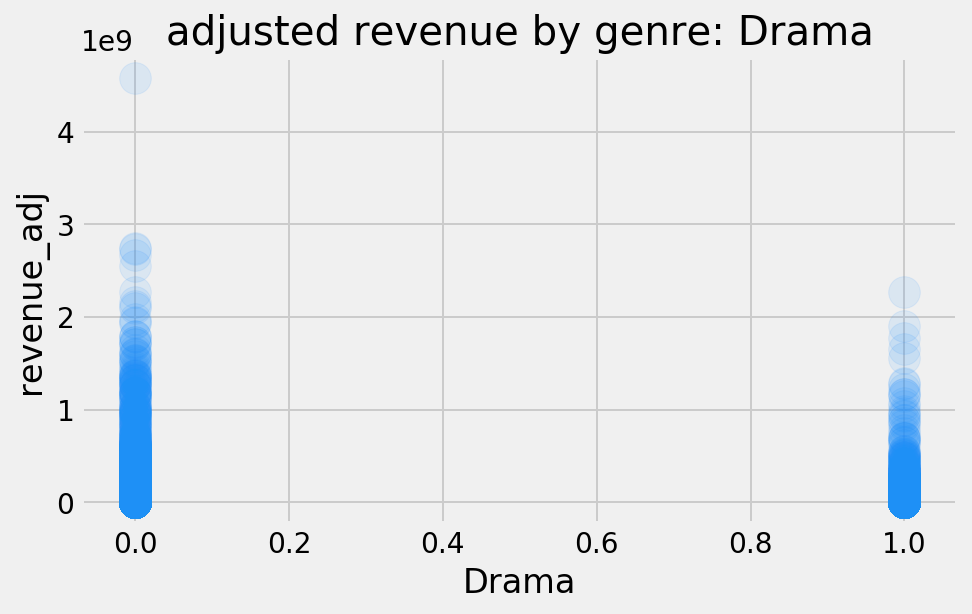

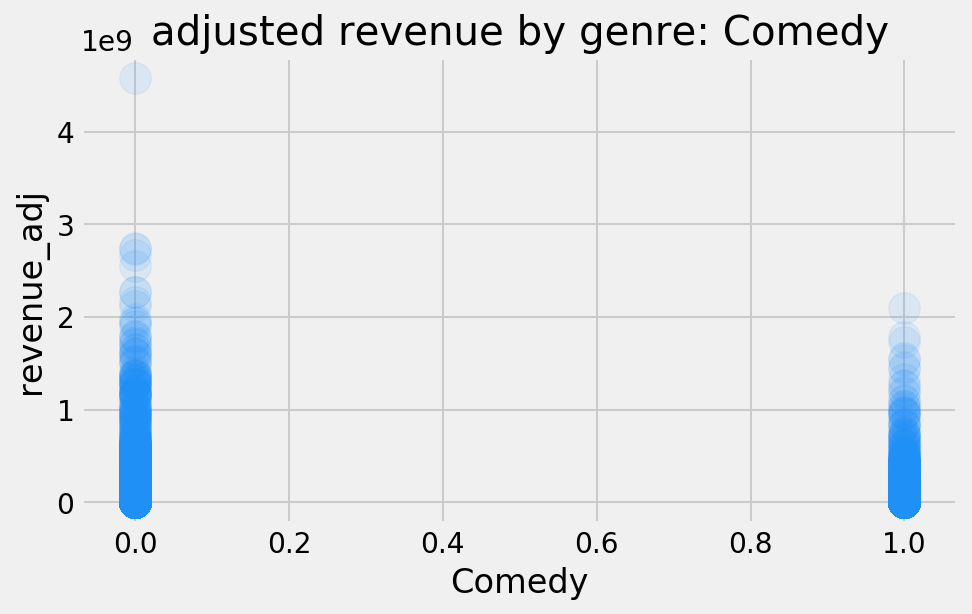

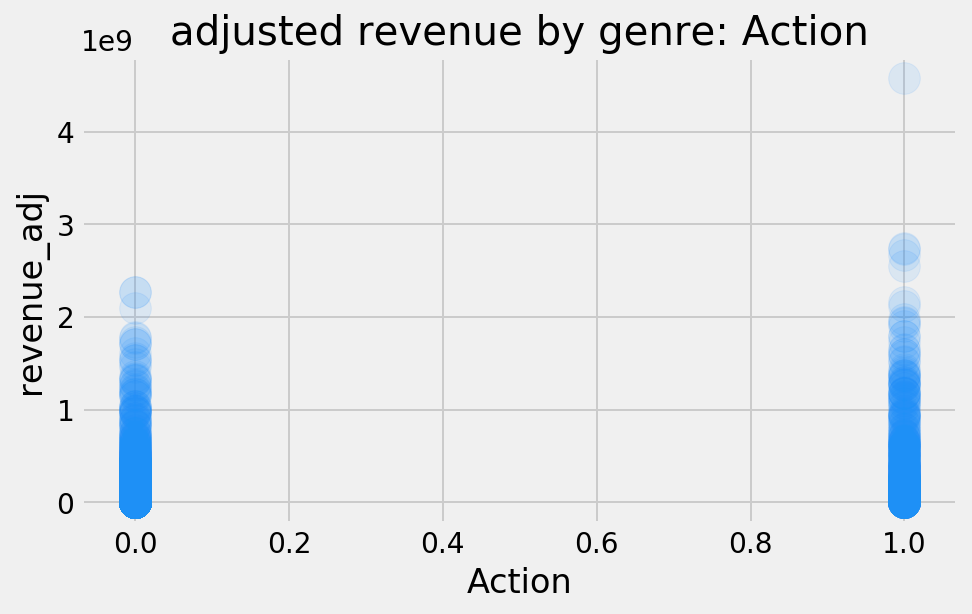

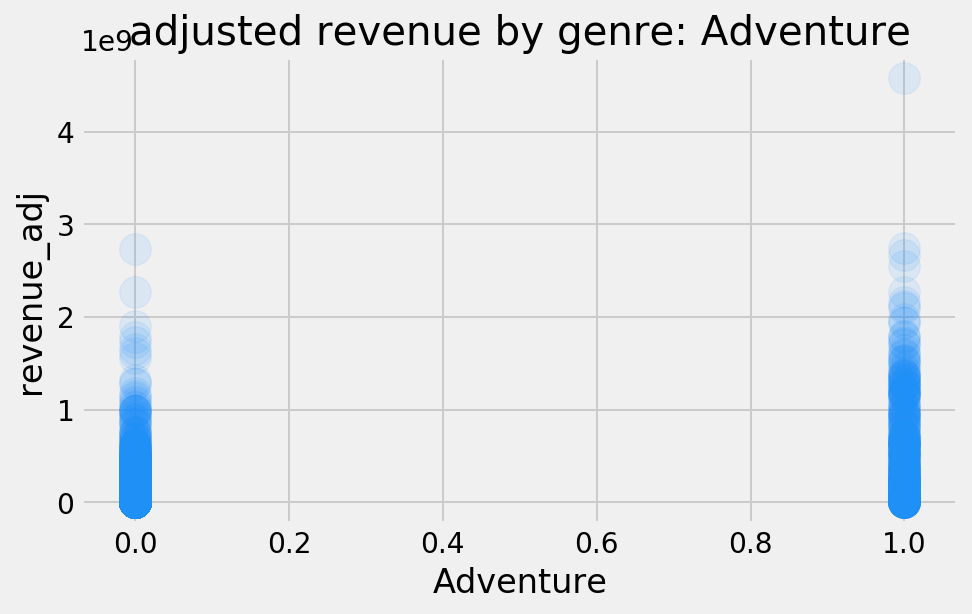

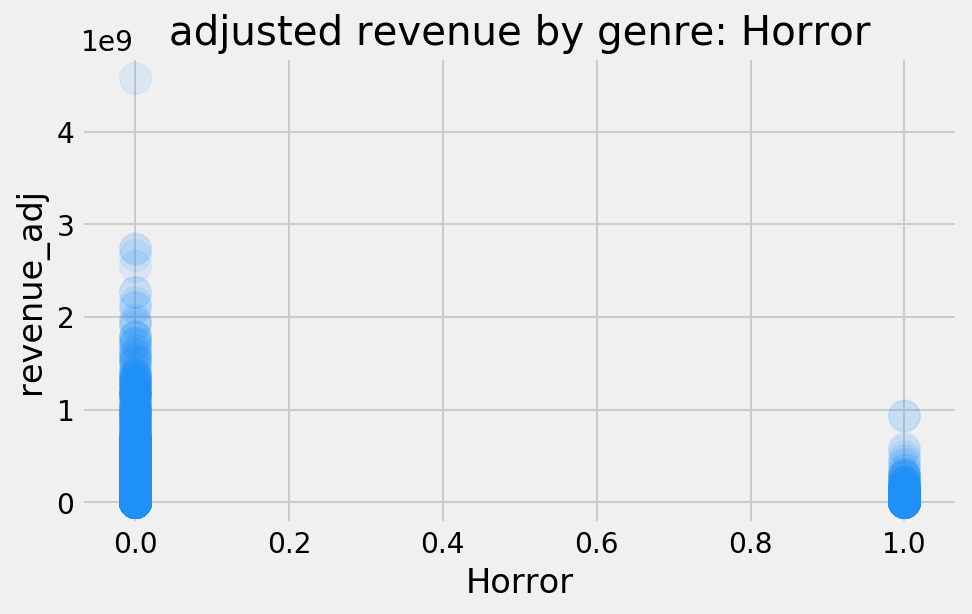

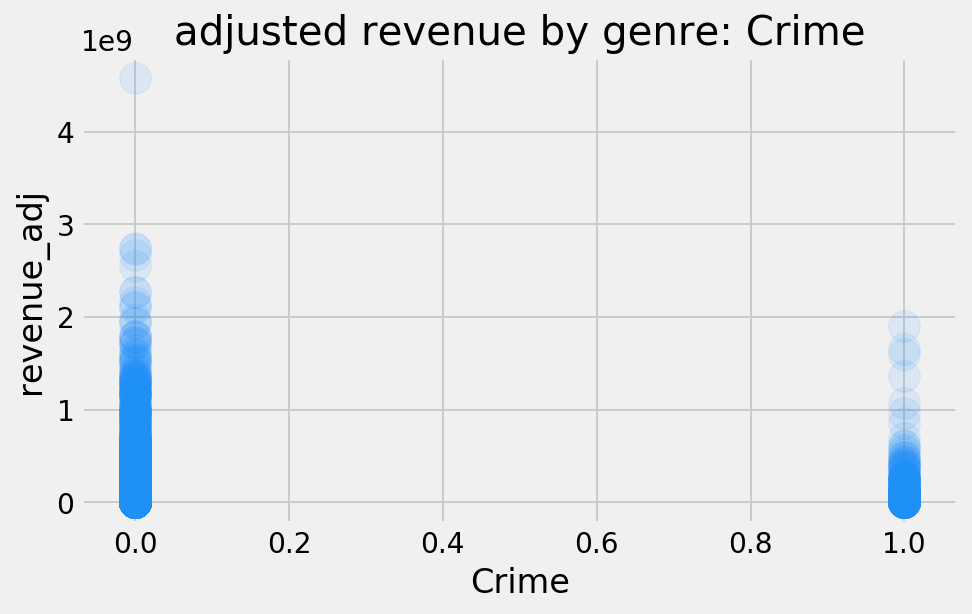

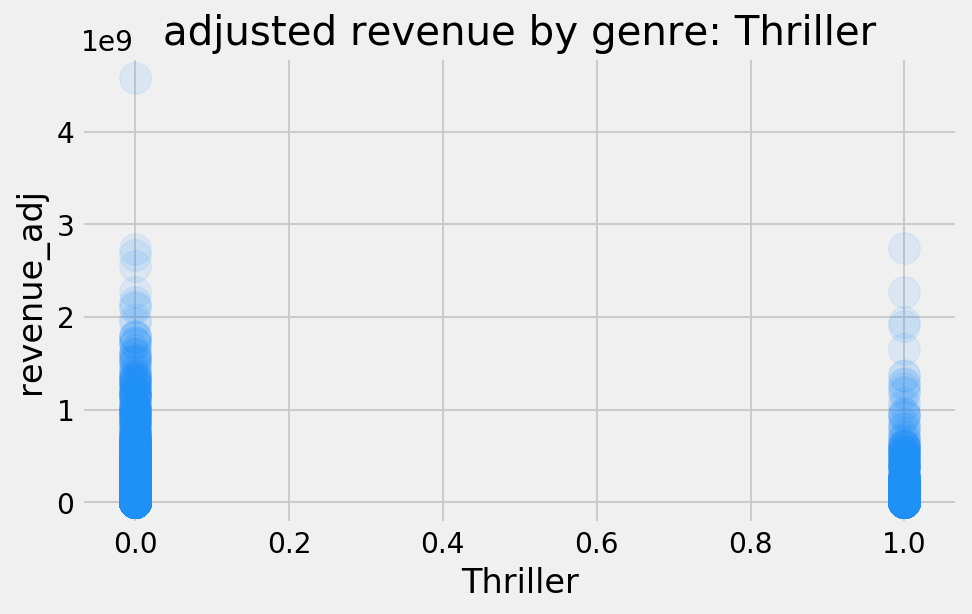

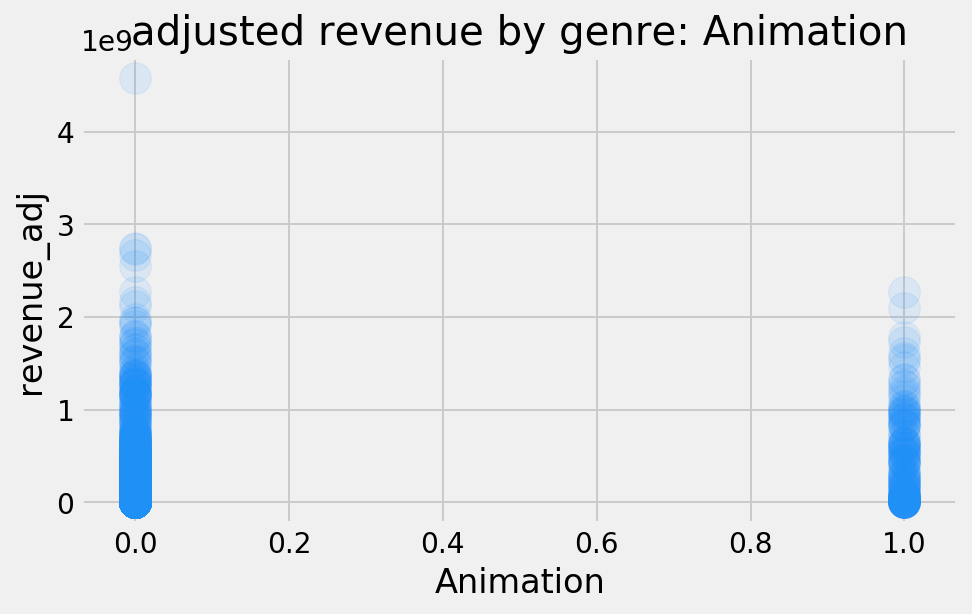

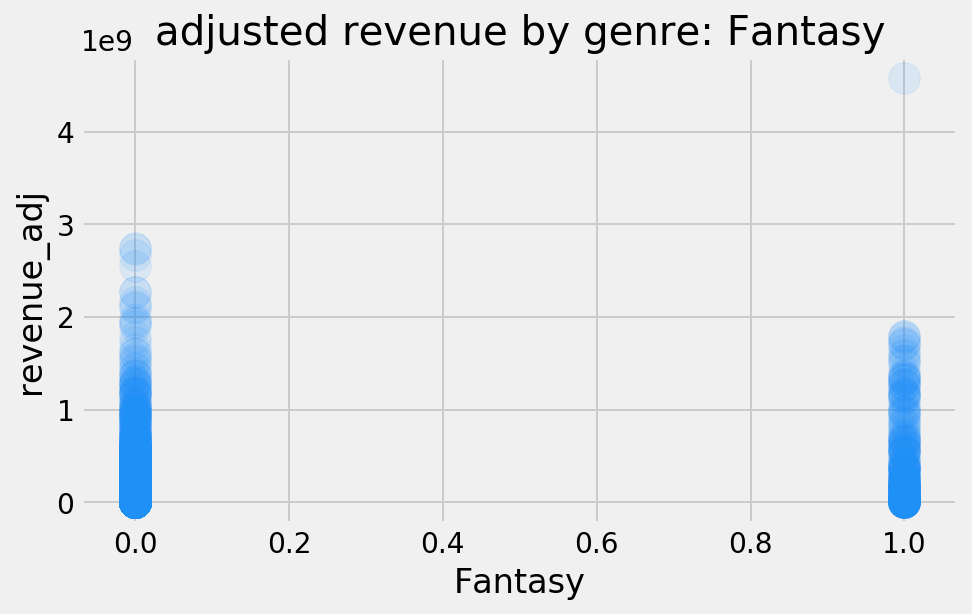

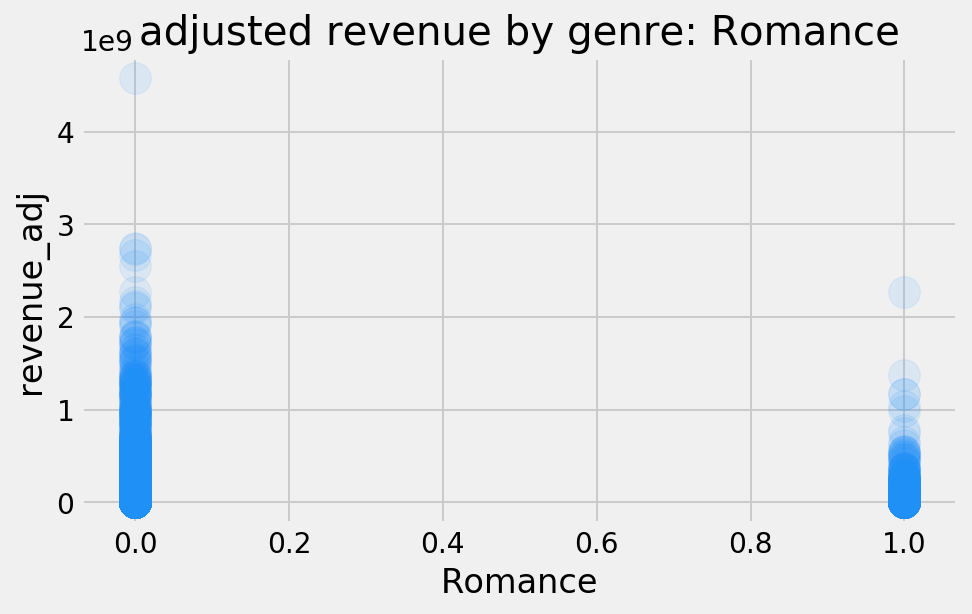

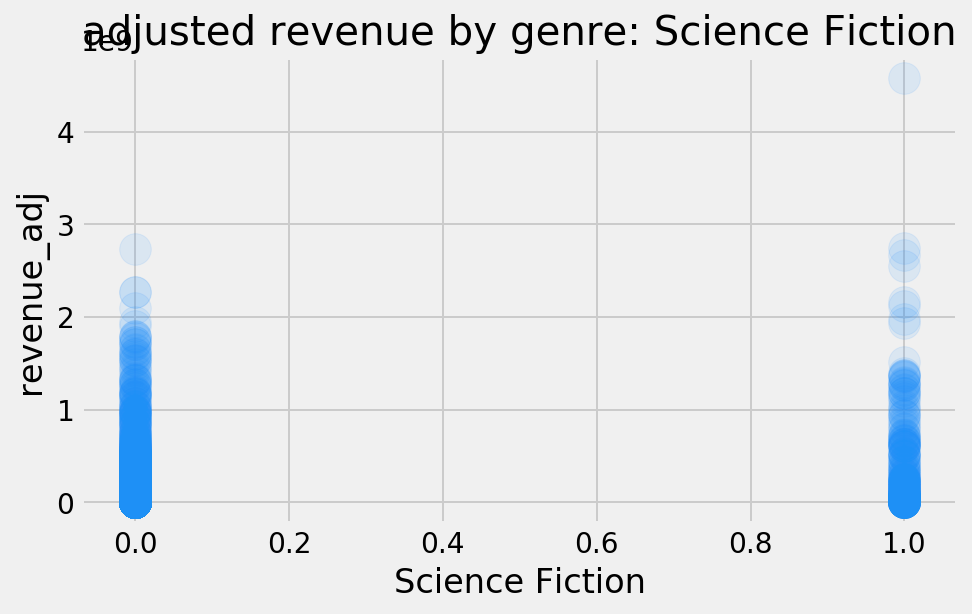

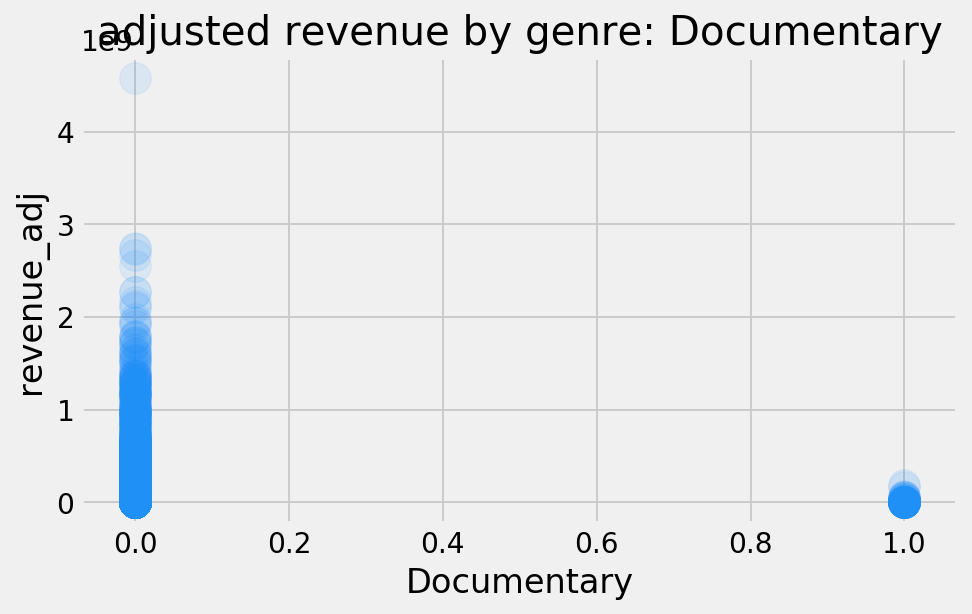

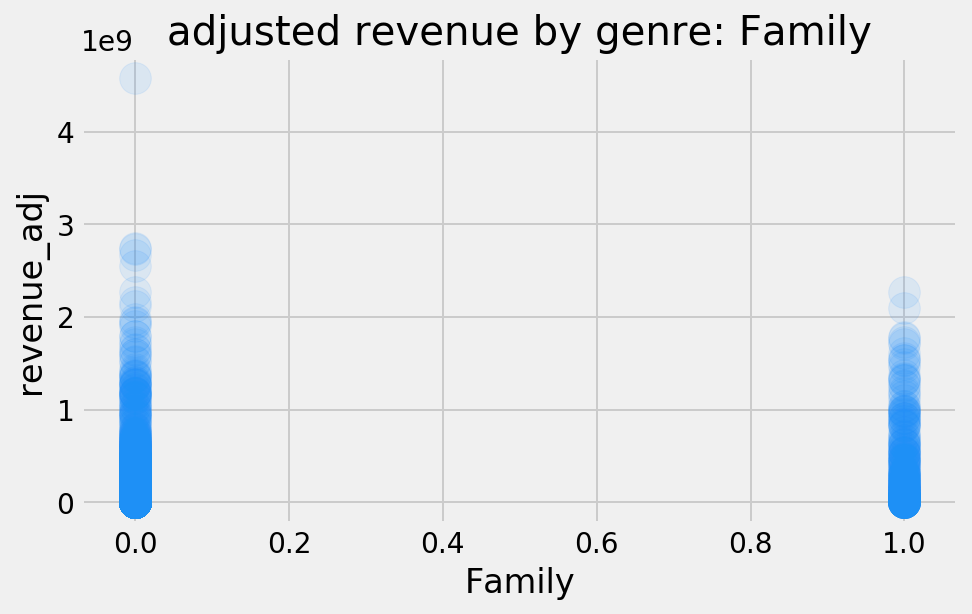

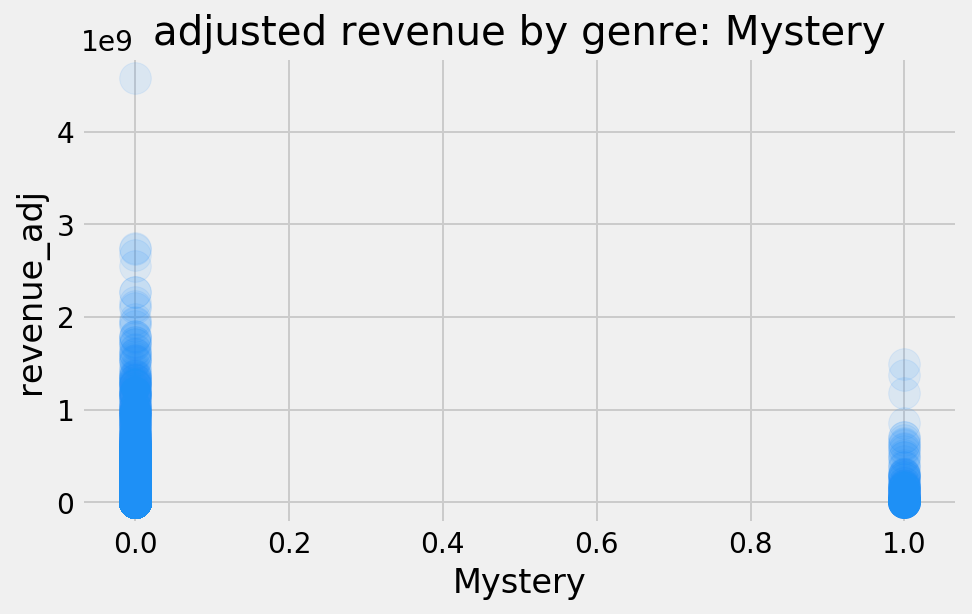

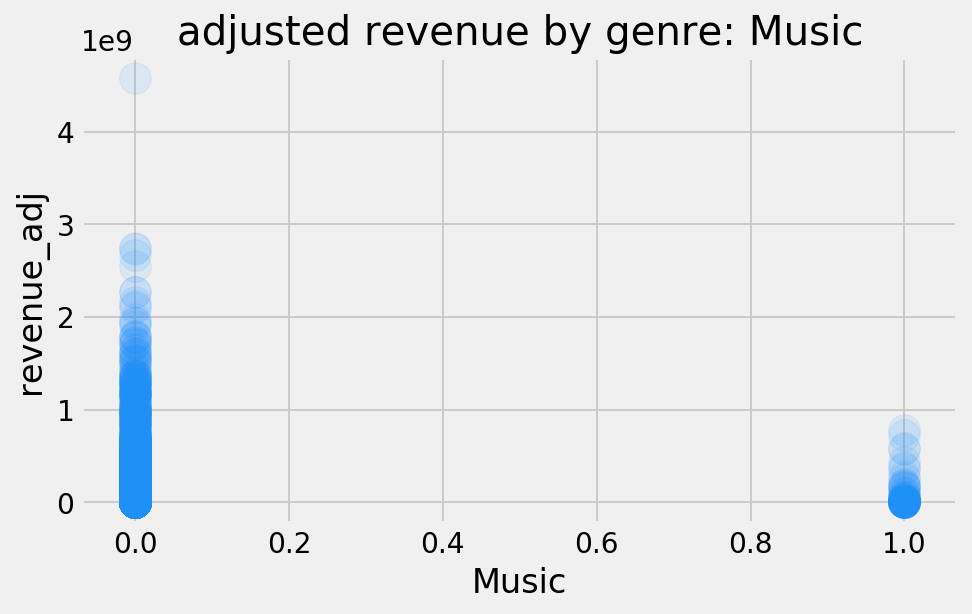

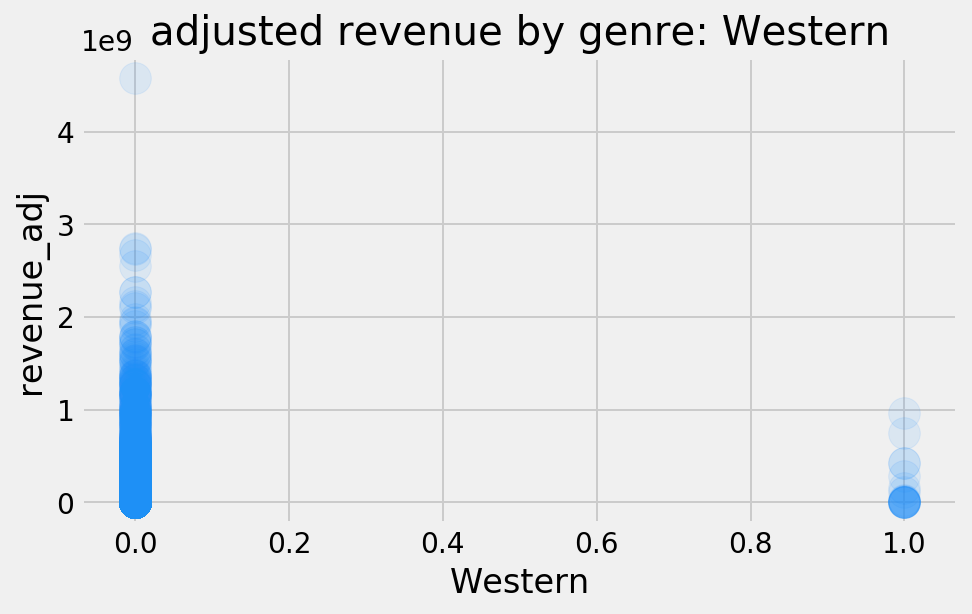

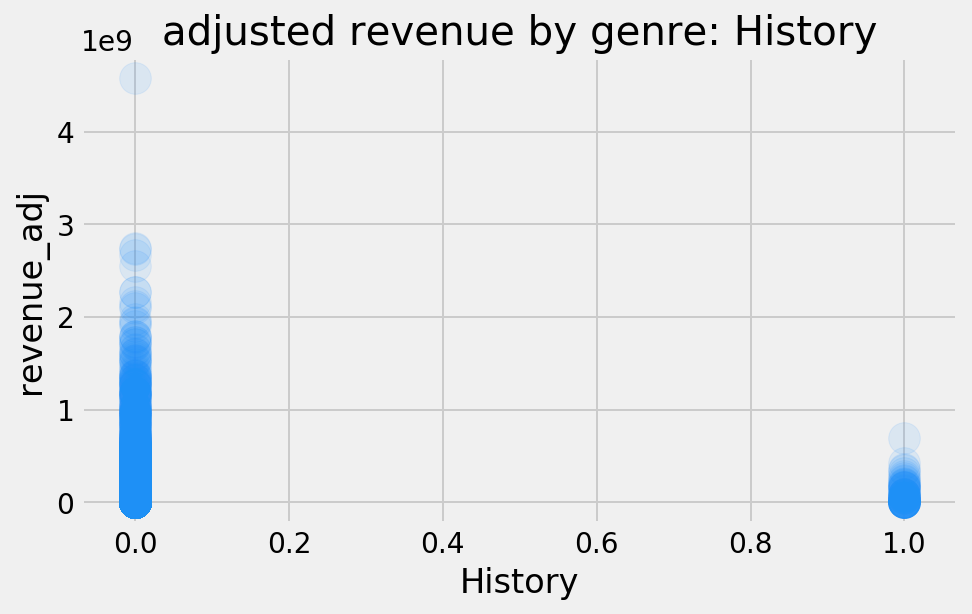

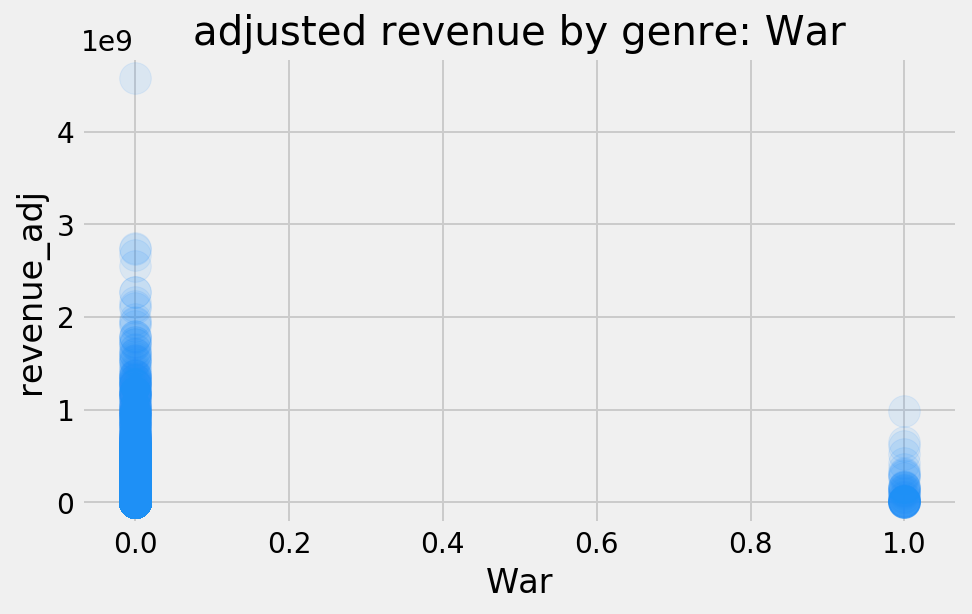

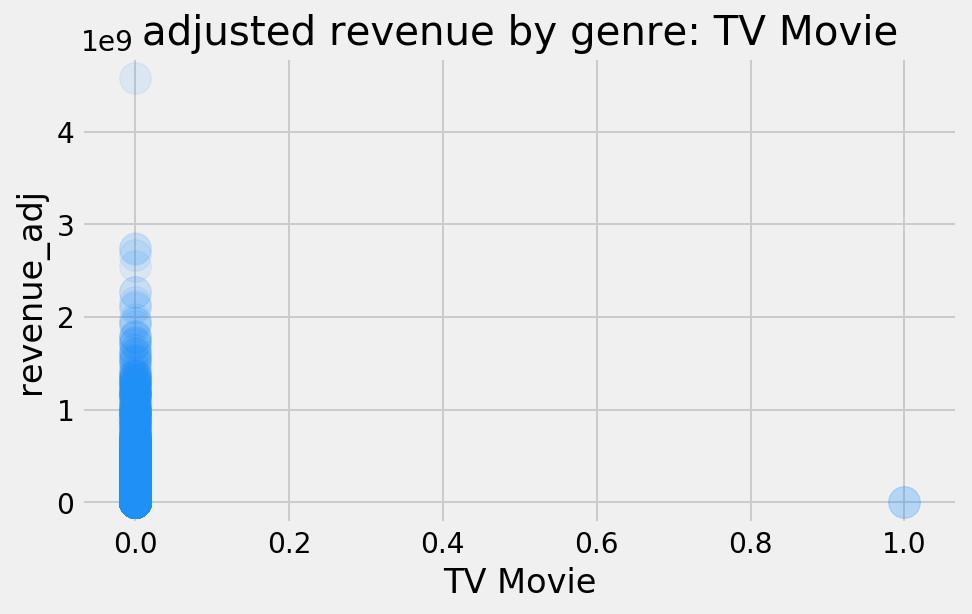

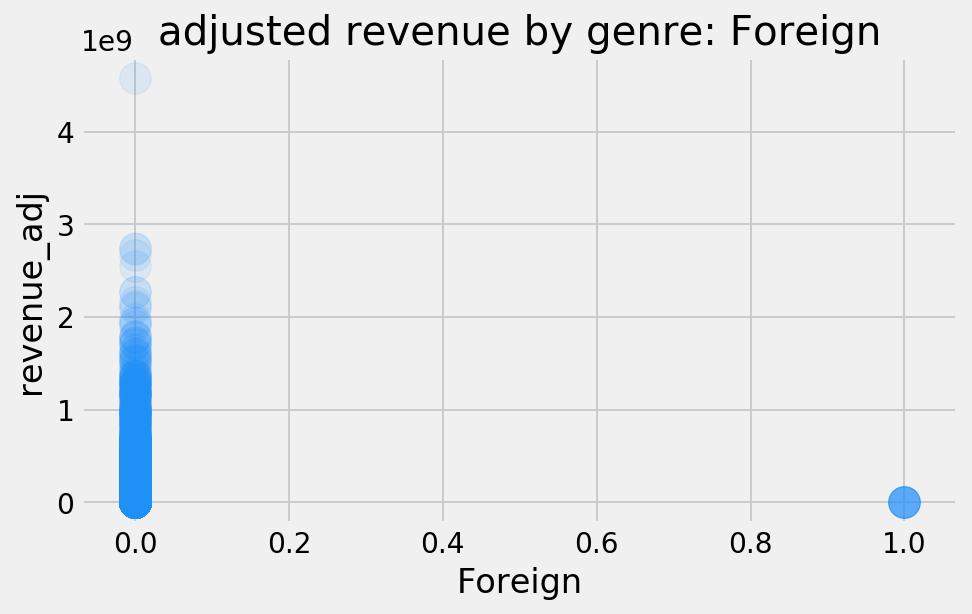

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for genre in genre_list:
    movies_1990_two.plot(x = genre, y='revenue_adj', kind='scatter', color='dodgerblue', figsize=(7,4), s=250, alpha = .1, title = ('adjusted revenue by genre: {}'.format(genre)));
    
    

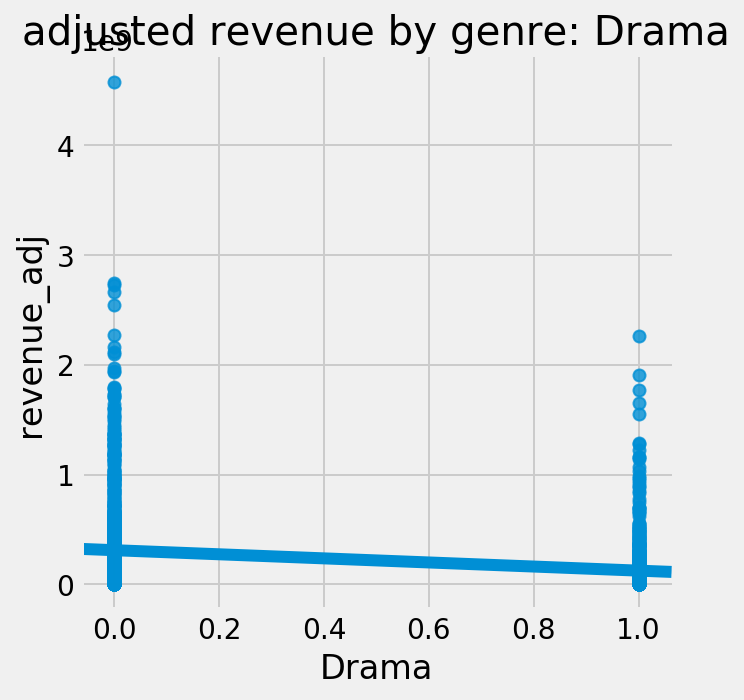

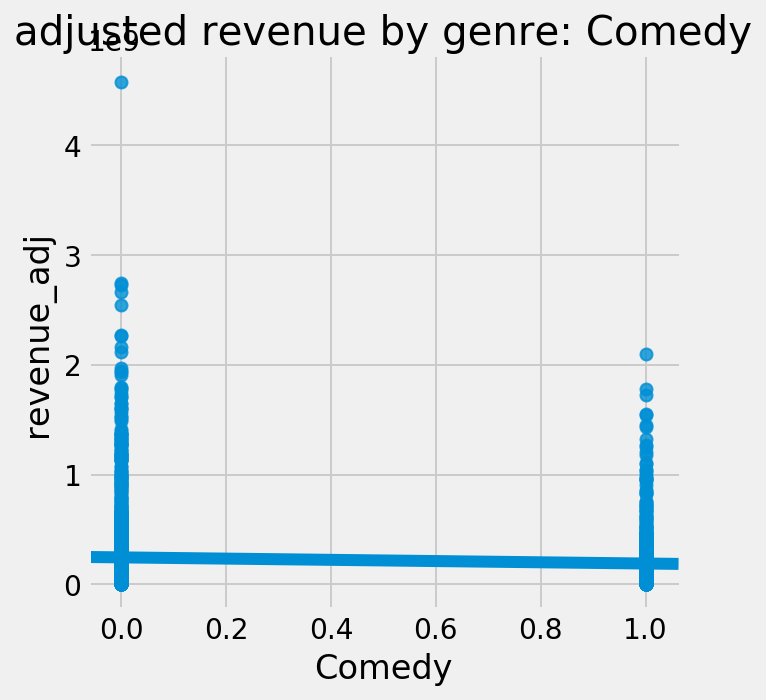

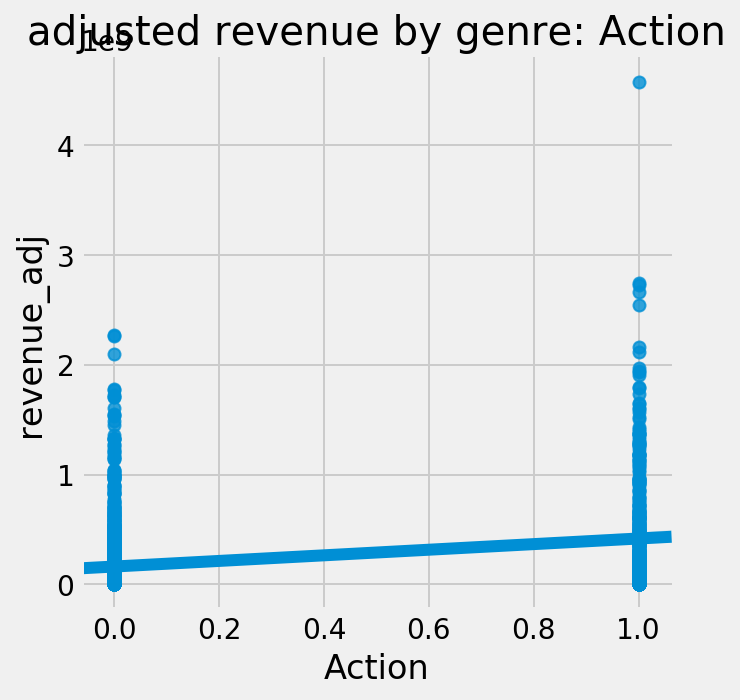

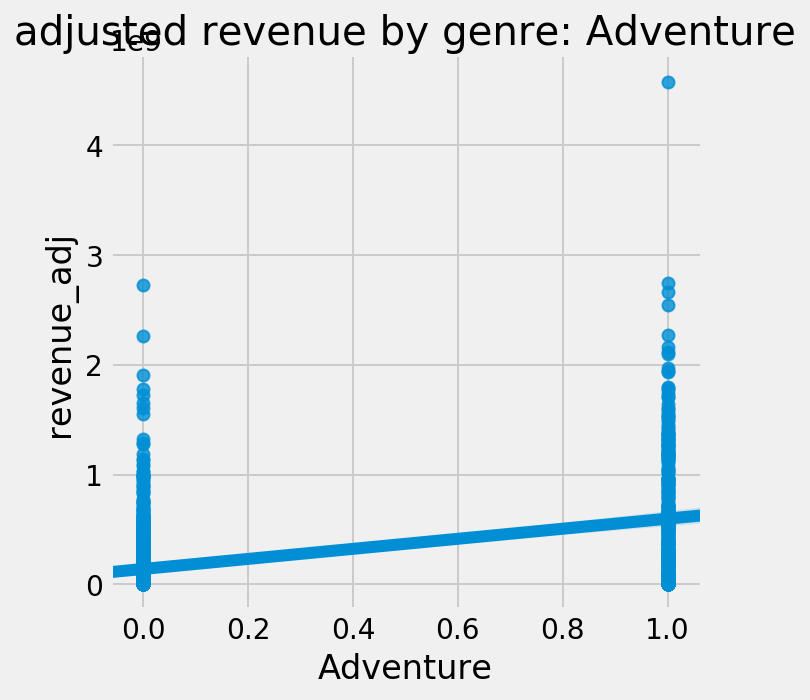

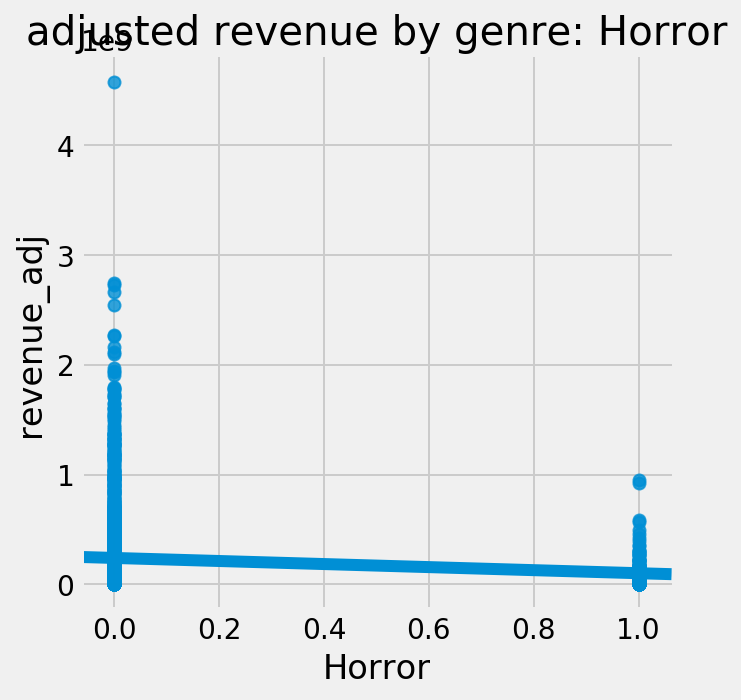

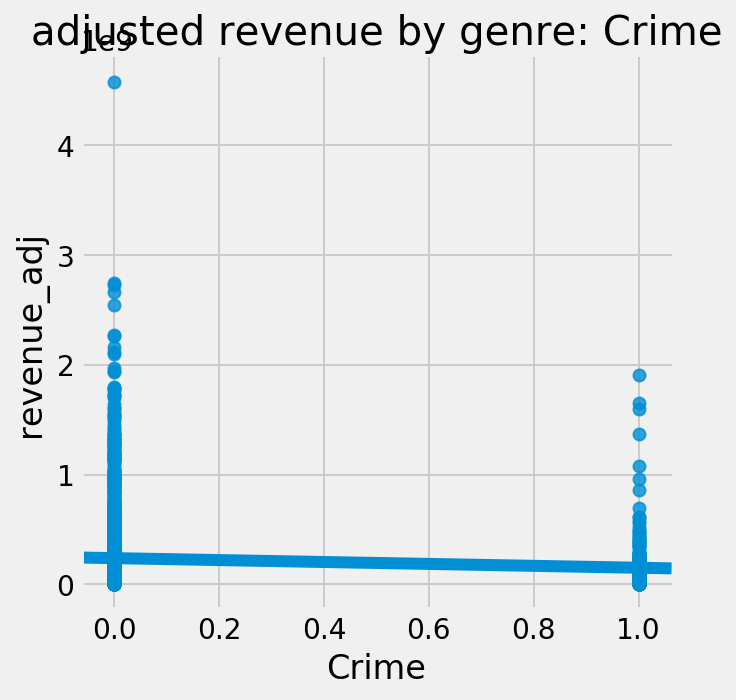

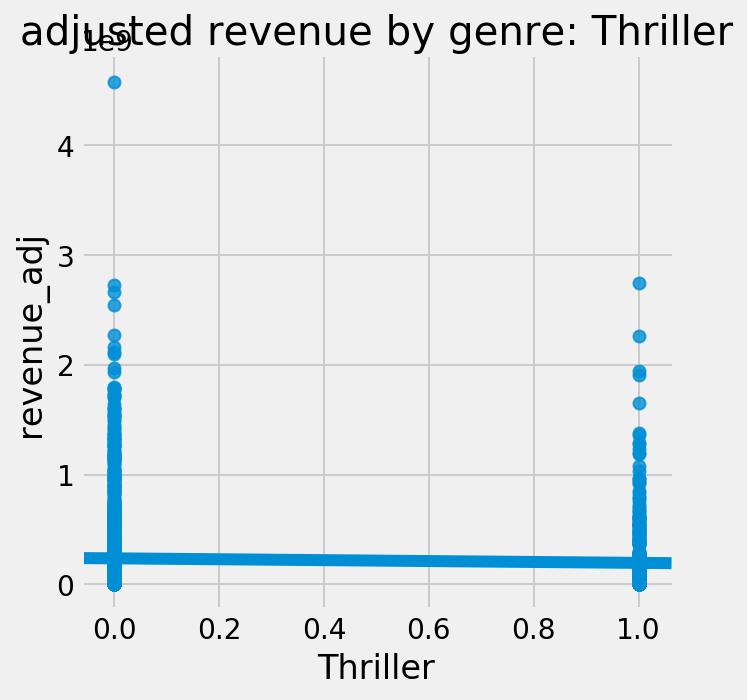

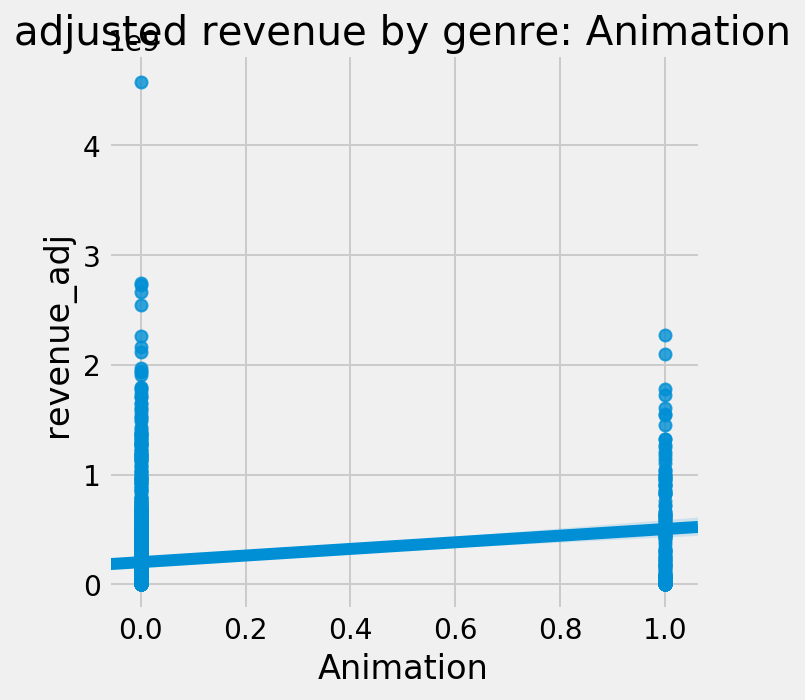

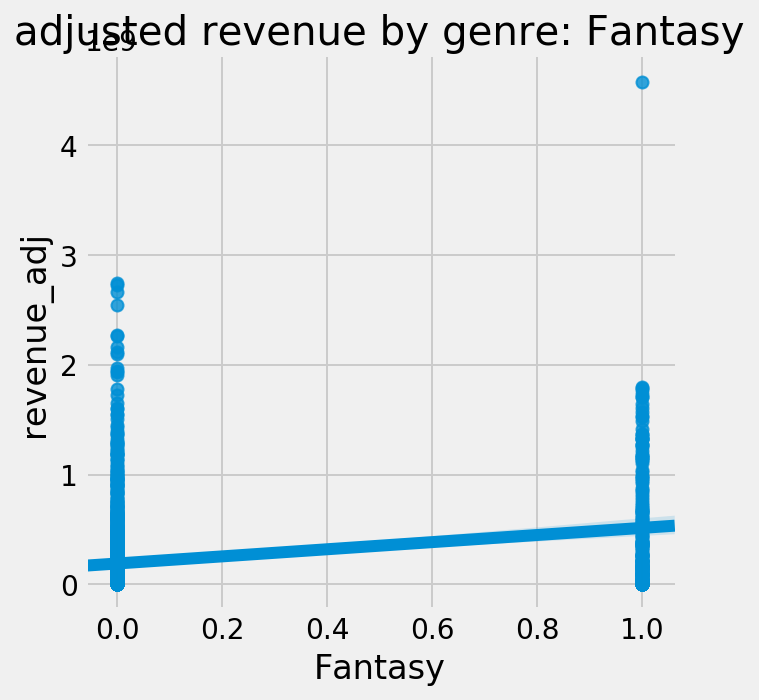

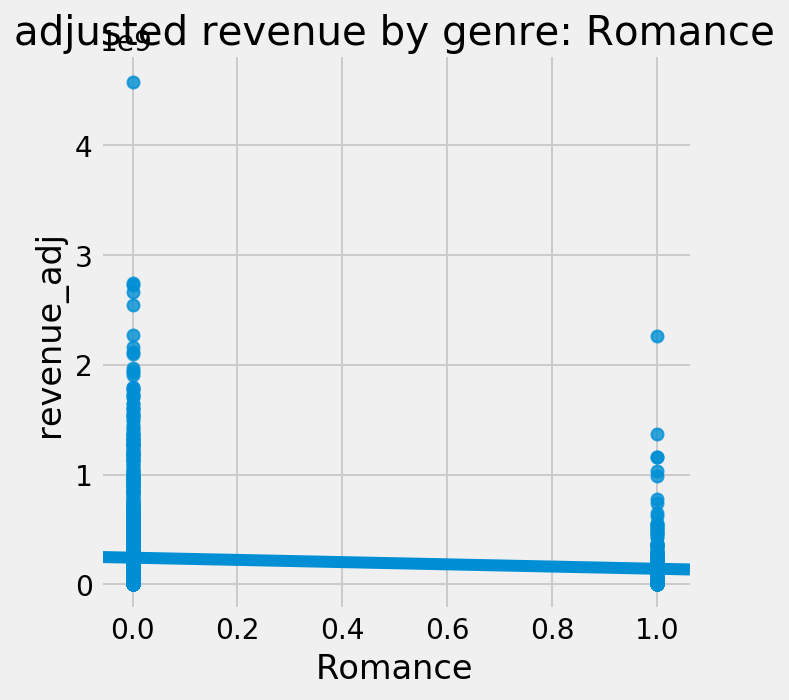

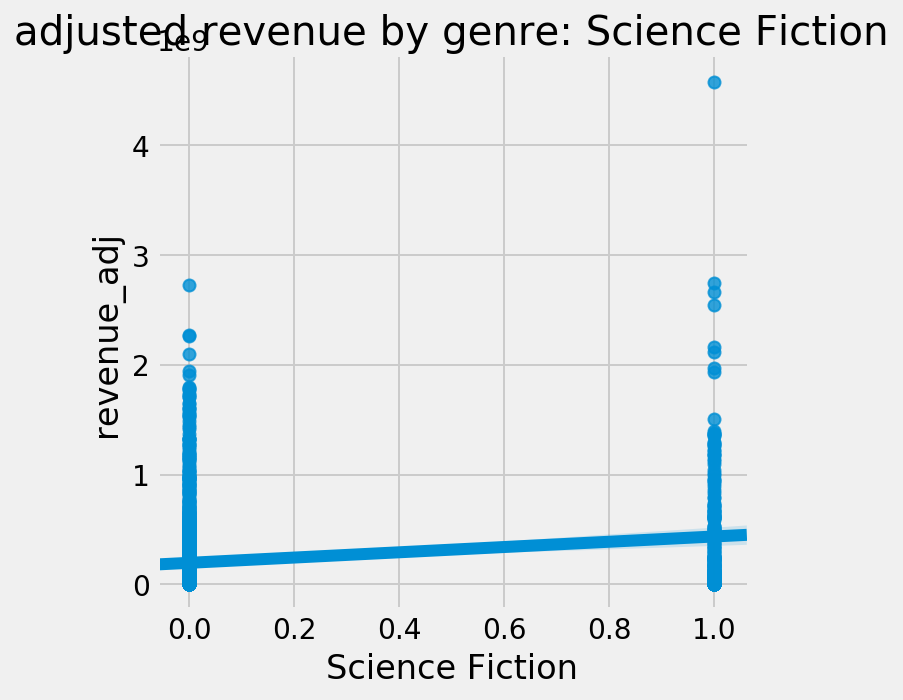

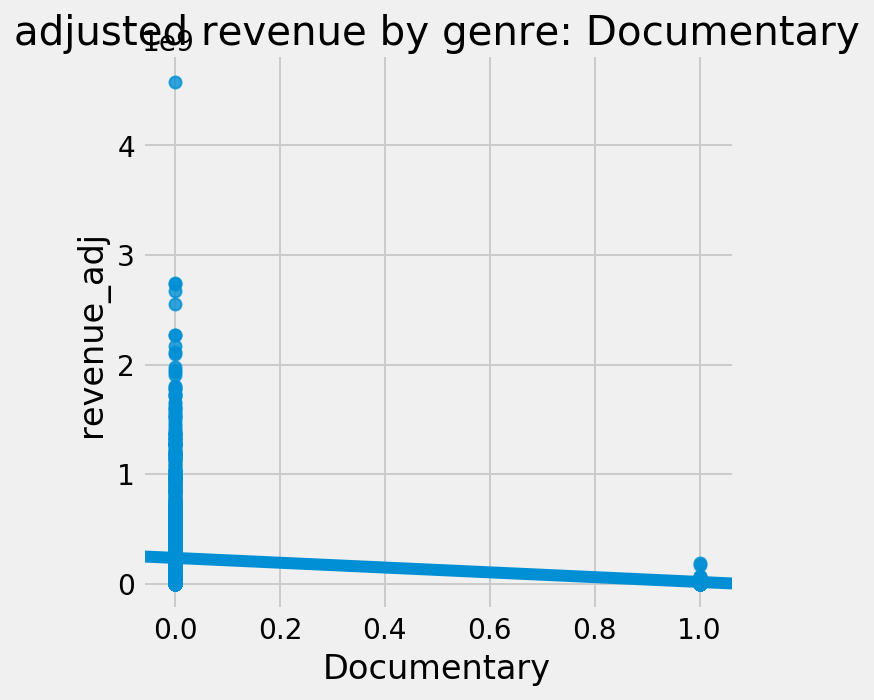

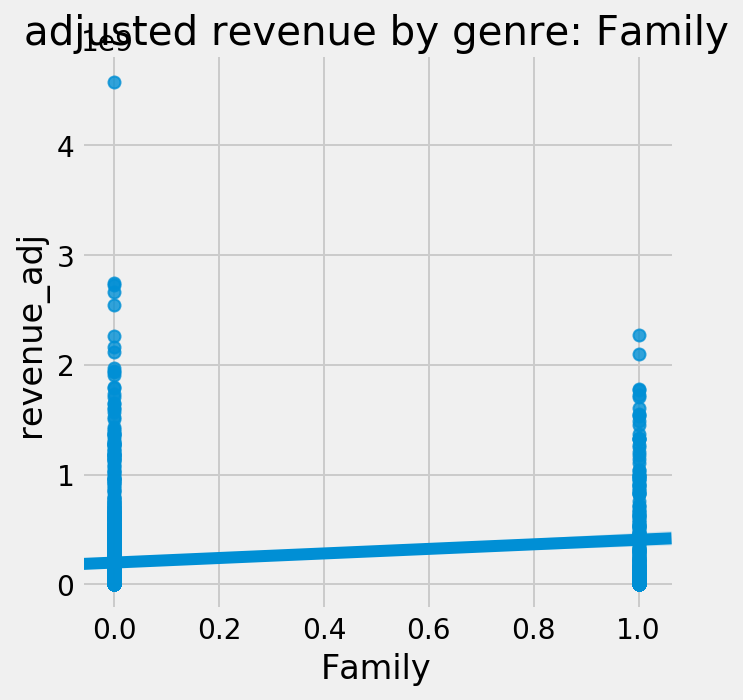

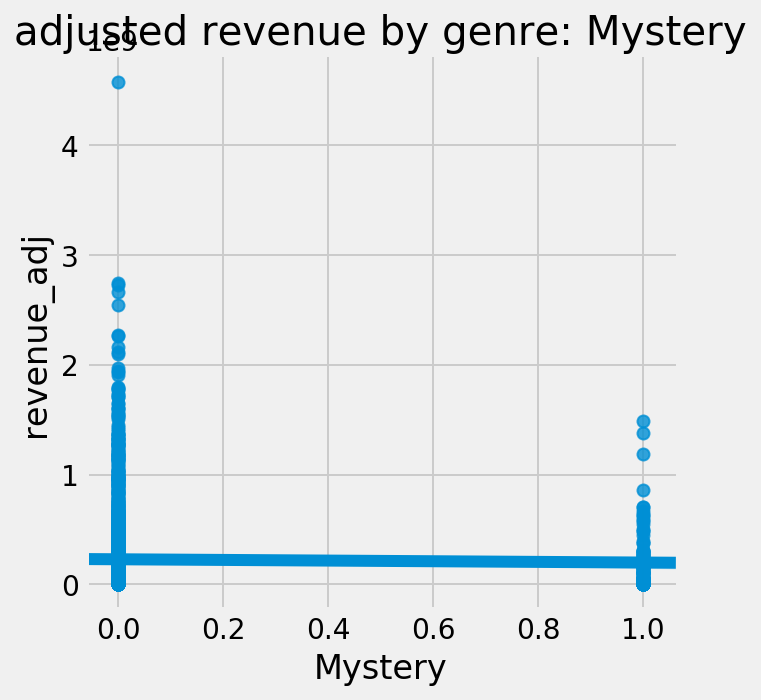

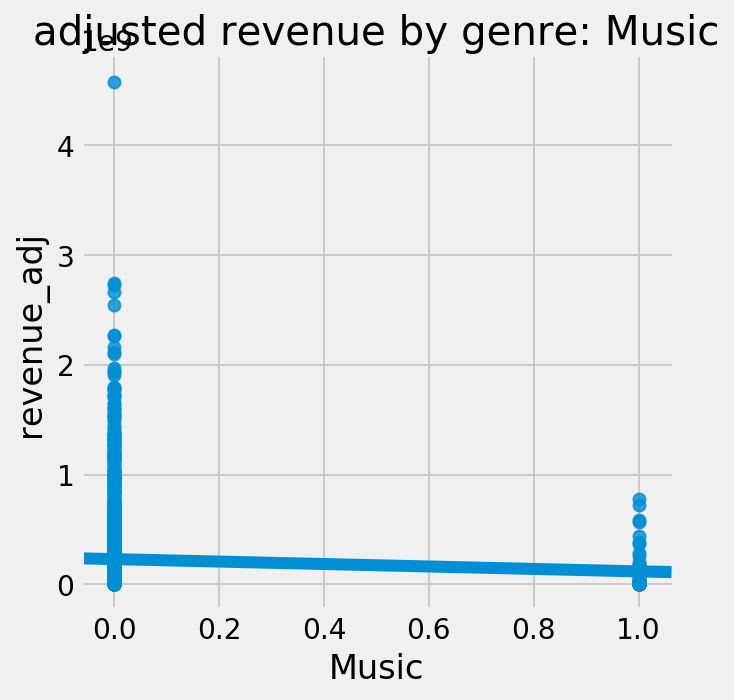

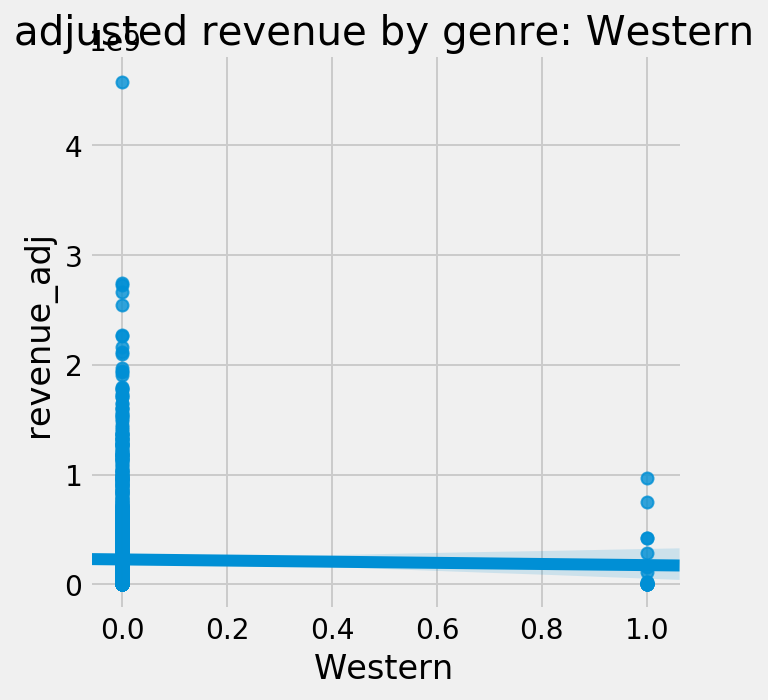

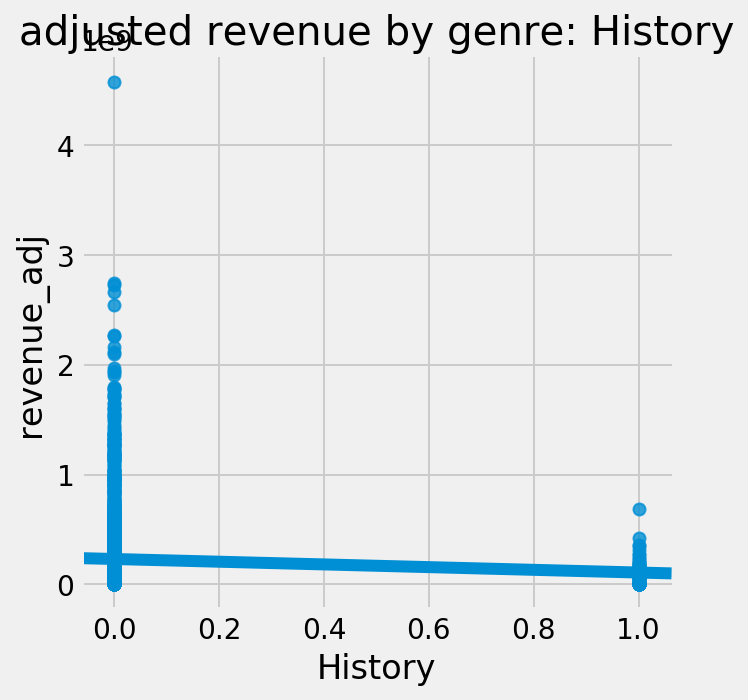

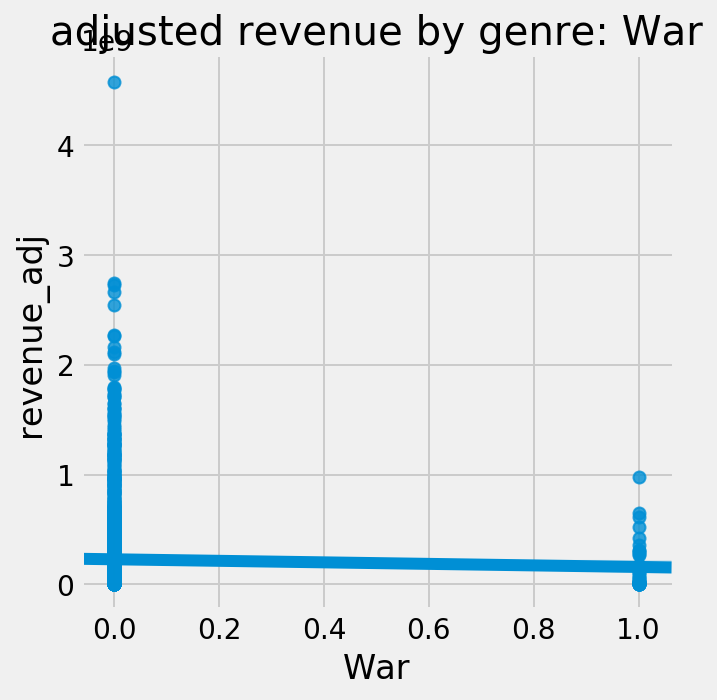

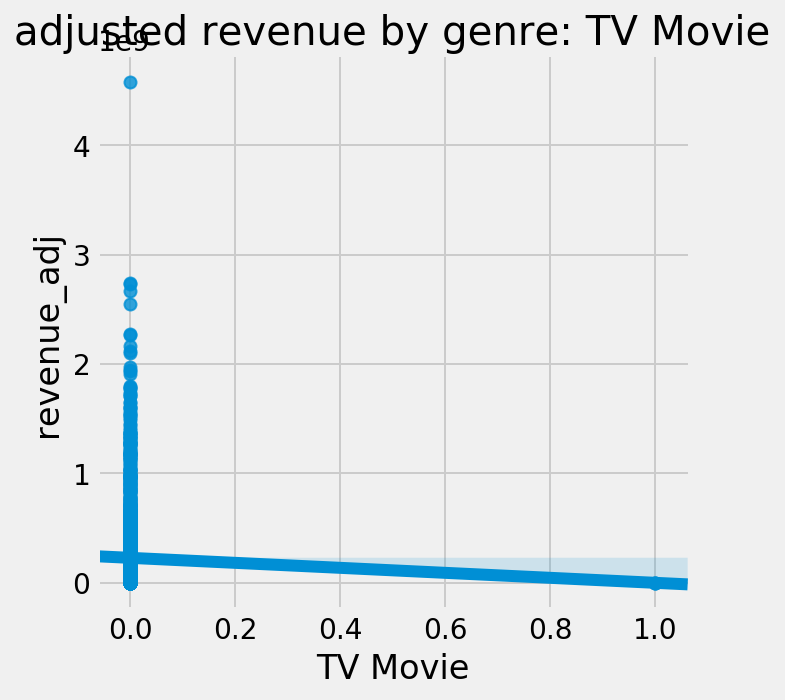

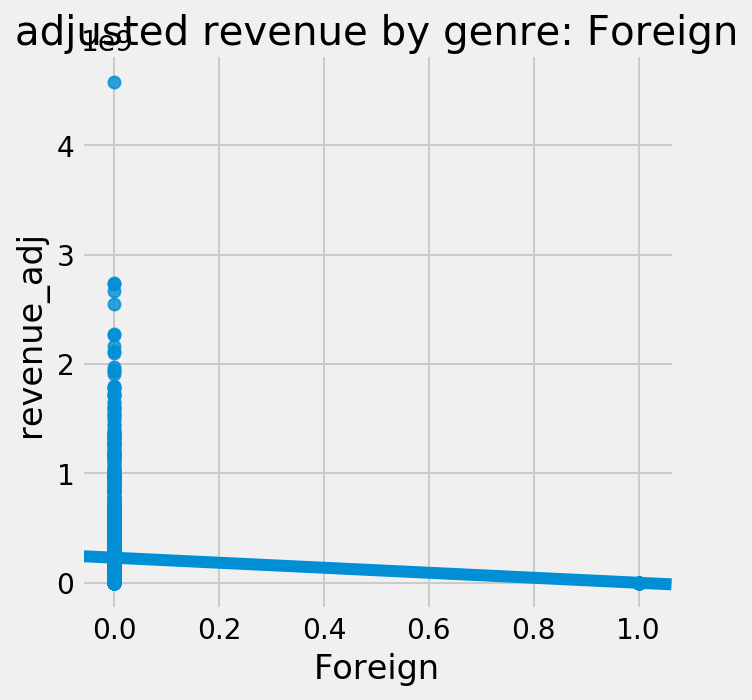

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for genre in genre_list:
    sns.lmplot(x = genre, y='revenue_adj',data=movies_1990_two,fit_reg=True)
    ax = plt.gca()
    ax.set_title('adjusted revenue by genre: {}'.format(genre))

In [159]:
movies_1990_two.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'overview',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count',
       'year', 'Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime',
       'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction',
       'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History',
       'War', 'TV Movie', 'Foreign', 'year_int', 'buying_power', 'revenue_adj',
       'budget_adj'],
      dtype='object')

In [163]:
feature_cols = ['runtime', 'Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime','Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction','Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History','War', 'TV Movie', 'Foreign','budget_adj']
X = movies_1990_two[feature_cols]
y = movies_1990_two.revenue_adj